* [1. Importing packages](#1.)


* [2. Data Exploration](#2.)

* [3. Initital notes based on data exploration](#3.)

* [4. Data Cleaning](#4.)
    * [4.1. Missing values](#4.1.)
    * [4.2. Remove Outliers](#4.2.)
    
    

* [5. Feature Selection](#5.)
    * [5.1. Principal Component Analysis](#5.1.)
    * [5.2. Chi-squared](#5.2.)
    * [5.3. Multiple Correspondance Analysis](#5.3.)
    
    
* [Creating variables to analyze relationship between booking date, cancelation date and arrival date](#.)

    
* [6. Final Checks](#6.)


* [7. Modelling](#7.)
    * [7.1. Decision Tree](#7.1.)
    * [7.2. KNN](#7.2.)
    * [7.3.  Linear Regression](#7.3.)
    * [7.4. Neural Network](#7.4.)
    * [7.5. HGB](#7.5.)
    * [7.6. Random Forest](#7.6.)
    * [7.7. Adaboost](#7.7.)
    * [7.8. Gradient Boosting](#7.8.)
    
    


# Introduction

<hr>
<a class="anchor" id="1.">
    
# 1. Importing packages
    
</a>

In [1]:
import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
#from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
#import graphvizd
import random
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec
import matplotlib.cm as cm
import seaborn as sns
import re
import sklearn.preprocessing as prep
import sklearn.impute as imp
import sklearn.covariance as cov
from datetime import datetime, date
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from numpy.linalg import svd
from scipy.spatial import distance_matrix
from scipy.stats import chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
#import graphviz
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

'''This has to be installed to run Self-Organizing Maps section'''
# install sompy (use our forked version - the original one has visualization bugs)
#!conda install git
#!pip install -U git+https://github.com/joaopfonseca/SOMPY.git

'''Run the below cells after installing SOMPY'''
#import sompy
#from sompy.visualization.mapview import View2D
#from sompy.visualization.bmuhits import BmuHitsView
#from sompy.visualization.hitmap import HitMapView

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #better quality of visualisations

import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
#from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
#import graphviz

# Defining PROJECT_ROOT
PROJECT_ROOT = Path(os.path.abspath('')).resolve().parents[0]

import warnings
warnings.filterwarnings('ignore')

import time
from math import ceil
from joblib import dump, load
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import warnings
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm
from sklearn.model_selection import KFold
from scipy import stats
from sklearn import preprocessing
import sklearn.neighbors as neighb
import prince
from statsmodels.graphics.gofplots import qqplot
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.legend_handler import HandlerLine2D
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

# Import Data

In [2]:
df = pd.read_csv('H2.csv')

# Data Assessment

In [3]:
df.shape

(79330, 31)

In [4]:
df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient  76.5                         0   
2         NULL                 0    Transient  68.0                         0   
3         NULL                 0    Transient  76.5                         0   
4         NULL                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [6]:
df.describe(include='all').transpose()

count unique               top   freq  \
IsCanceled                   79330    NaN               NaN    NaN   
LeadTime                     79330    NaN               NaN    NaN   
ArrivalDateYear              79330    NaN               NaN    NaN   
ArrivalDateMonth             79330     12            August   8983   
ArrivalDateWeekNumber        79330    NaN               NaN    NaN   
ArrivalDateDayOfMonth        79330    NaN               NaN    NaN   
StaysInWeekendNights         79330    NaN               NaN    NaN   
StaysInWeekNights            79330    NaN               NaN    NaN   
Adults                       79330    NaN               NaN    NaN   
Children                     79326    NaN               NaN    NaN   
Babies                       79330    NaN               NaN    NaN   
Meal                         79330      4         BB         62305   
Country                      79306    166               PRT  30960   
MarketSegment                79330      8         Online TA  38748   
DistributionChannel          79330      5             TA/TO  68945   
IsRepeatedGuest              79330    NaN               NaN    NaN   
PreviousCancellations        79330    NaN               NaN    NaN   
PreviousBookingsNotCanceled  79330    NaN               NaN    NaN   
ReservedRoomType             79330      8  A                 62595   
AssignedRoomType             79330      9  A                 57007   
BookingChanges               79330    NaN               NaN    NaN   
DepositType                  79330      3   No Deposit       66442   
Agent                        79330    224                 9  31955   
Company                      79330    208              NULL  75641   
DaysInWaitingList            79330    NaN               NaN    NaN   
CustomerType                 79330      4         Transient  59404   
ADR                          79330    NaN               NaN    NaN   
RequiredCarParkingSpaces     79330    NaN               NaN    NaN   
TotalOfSpecialRequests       79330    NaN               NaN    NaN   
ReservationStatus            79330      3         Check-Out  46228   
ReservationStatusDate        79330    864        2015-10-21   1416   

                                   mean        std   min   25%   50%   75%  \
IsCanceled                      0.41727   0.493111     0     0     0     1   
LeadTime                        109.736    110.949     0    23    74   163   
ArrivalDateYear                 2016.17   0.699181  2015  2016  2016  2017   
ArrivalDateMonth                    NaN        NaN   NaN   NaN   NaN   NaN   
ArrivalDateWeekNumber           27.1774    13.3985     1    17    27    38   
ArrivalDateDayOfMonth           15.7866    8.72845     1     8    16    23   
StaysInWeekendNights           0.795185   0.885026     0     0     1     2   
StaysInWeekNights               2.18296    1.45642     0     1     2     3   
Adults                          1.85098   0.509292     0     2     2     2   
Children                      0.0913698   0.372177     0     0     0     0   
Babies                       0.00494138  0.0843233     0     0     0     0   
Meal                                NaN        NaN   NaN   NaN   NaN   NaN   
Country                             NaN        NaN   NaN   NaN   NaN   NaN   
MarketSegment                       NaN        NaN   NaN   NaN   NaN   NaN   
DistributionChannel                 NaN        NaN   NaN   NaN   NaN   NaN   
IsRepeatedGuest               0.0256145   0.157983     0     0     0     0   
PreviousCancellations         0.0797428   0.415472     0     0     0     0   
PreviousBookingsNotCanceled    0.132371    1.69341     0     0     0     0   
ReservedRoomType                    NaN        NaN   NaN   NaN   NaN   NaN   
AssignedRoomType                    NaN        NaN   NaN   NaN   NaN   NaN   
BookingChanges                 0.187369    0.60862     0     0     0     0   
DepositType                         NaN        NaN   NaN   NaN   NaN   N

In [7]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [8]:
df.loc[df.duplicated(keep=False), :]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
8               1        62             2015             July   
9               1        62             2015             July   
10              0        43             2015             July   
12              0        43             2015             July   
17              0        43             2015             July   
...           ...       ...              ...              ...   
79292           0        63             2017           August   
79293           0        63             2017           August   
79294           0        63             2017           August   
79312           0       175             2017           August   
79313           0       175             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
8                         27                      2                     2   
9                         27                      2                     2   
10                        27                      3                     0   
12                        27                      3                     0   
17                        27                      3                     0   
...                      ...                    ...                   ...   
79292                     35                     31                     0   
79293                     35                     31                     0   
79294                     35                     31                     0   
79312                     35                     31                     1   
79313                     35                     31                     1   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
8                      3       2       0.0  ...  No Deposit                 8   
9                      3       2       0.0  ...  No Deposit                 8   
10                     2       2       0.0  ...  No Deposit                 1   
12                     2       2       0.0  ...  No Deposit                 1   
17                     2       2       0.0  ...  No Deposit                 1   
...                  ...     ...       ...  ...              ...          ...   
79292                  3       3       0.0  ...  No Deposit                 9   
79293                  3       3       0.0  ...  No Deposit                 9   
79294                  3       3       0.0  ...  No Deposit                 9   
79312                  3       1       0.0  ...  No Deposit                42   
79313                  3       1       0.0  ...  No Deposit                42   

           Company DaysInWaitingList     CustomerType     ADR  \
8             NULL                 0        Transient   76.50   
9             NULL                 0        Transient   76.50   
10            NULL                 0  Transient-Party   86.00   
12            NULL                 0  Transient-Party   86.00   
17            NULL                 0  Transient-Party   86.00   
...            ...               ...              ...     ...   
79292         NULL                 0  Transient-Party  195.33   
79293         NULL                 0  Transient-Party  195.33   
79294         NULL                 0  Transient-Party  195.33   
79312         NULL                 0        Transient   82.35   
79313         NULL                 0        Transient   82.35   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
8                             0                       1           No-Show   
9                             0                       1           No-Show   
10                            0                       0         Check-Out   
12                            0                       0         Check-Out   
17                            0                       0         Check-Out   
...                         ...                     ...               ...   
79292   

In [9]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

<hr>
<a class="anchor" id="2.">
    
# 2. Data Exploration
    
</a>

In [10]:
# Define metric and non-metric features
metric_features = ['LeadTime','ArrivalDateWeekNumber', 'ArrivalDateYear', 'ArrivalDateDayOfMonth',
                       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
                       'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 
                       'BookingChanges', 'DaysInWaitingList', 'ADR',
                       'TotalOfSpecialRequests', 'RequiredCarParkingSpaces' ]

non_metric_features = df.columns.drop(metric_features).to_list()


In [11]:
len(metric_features)

16

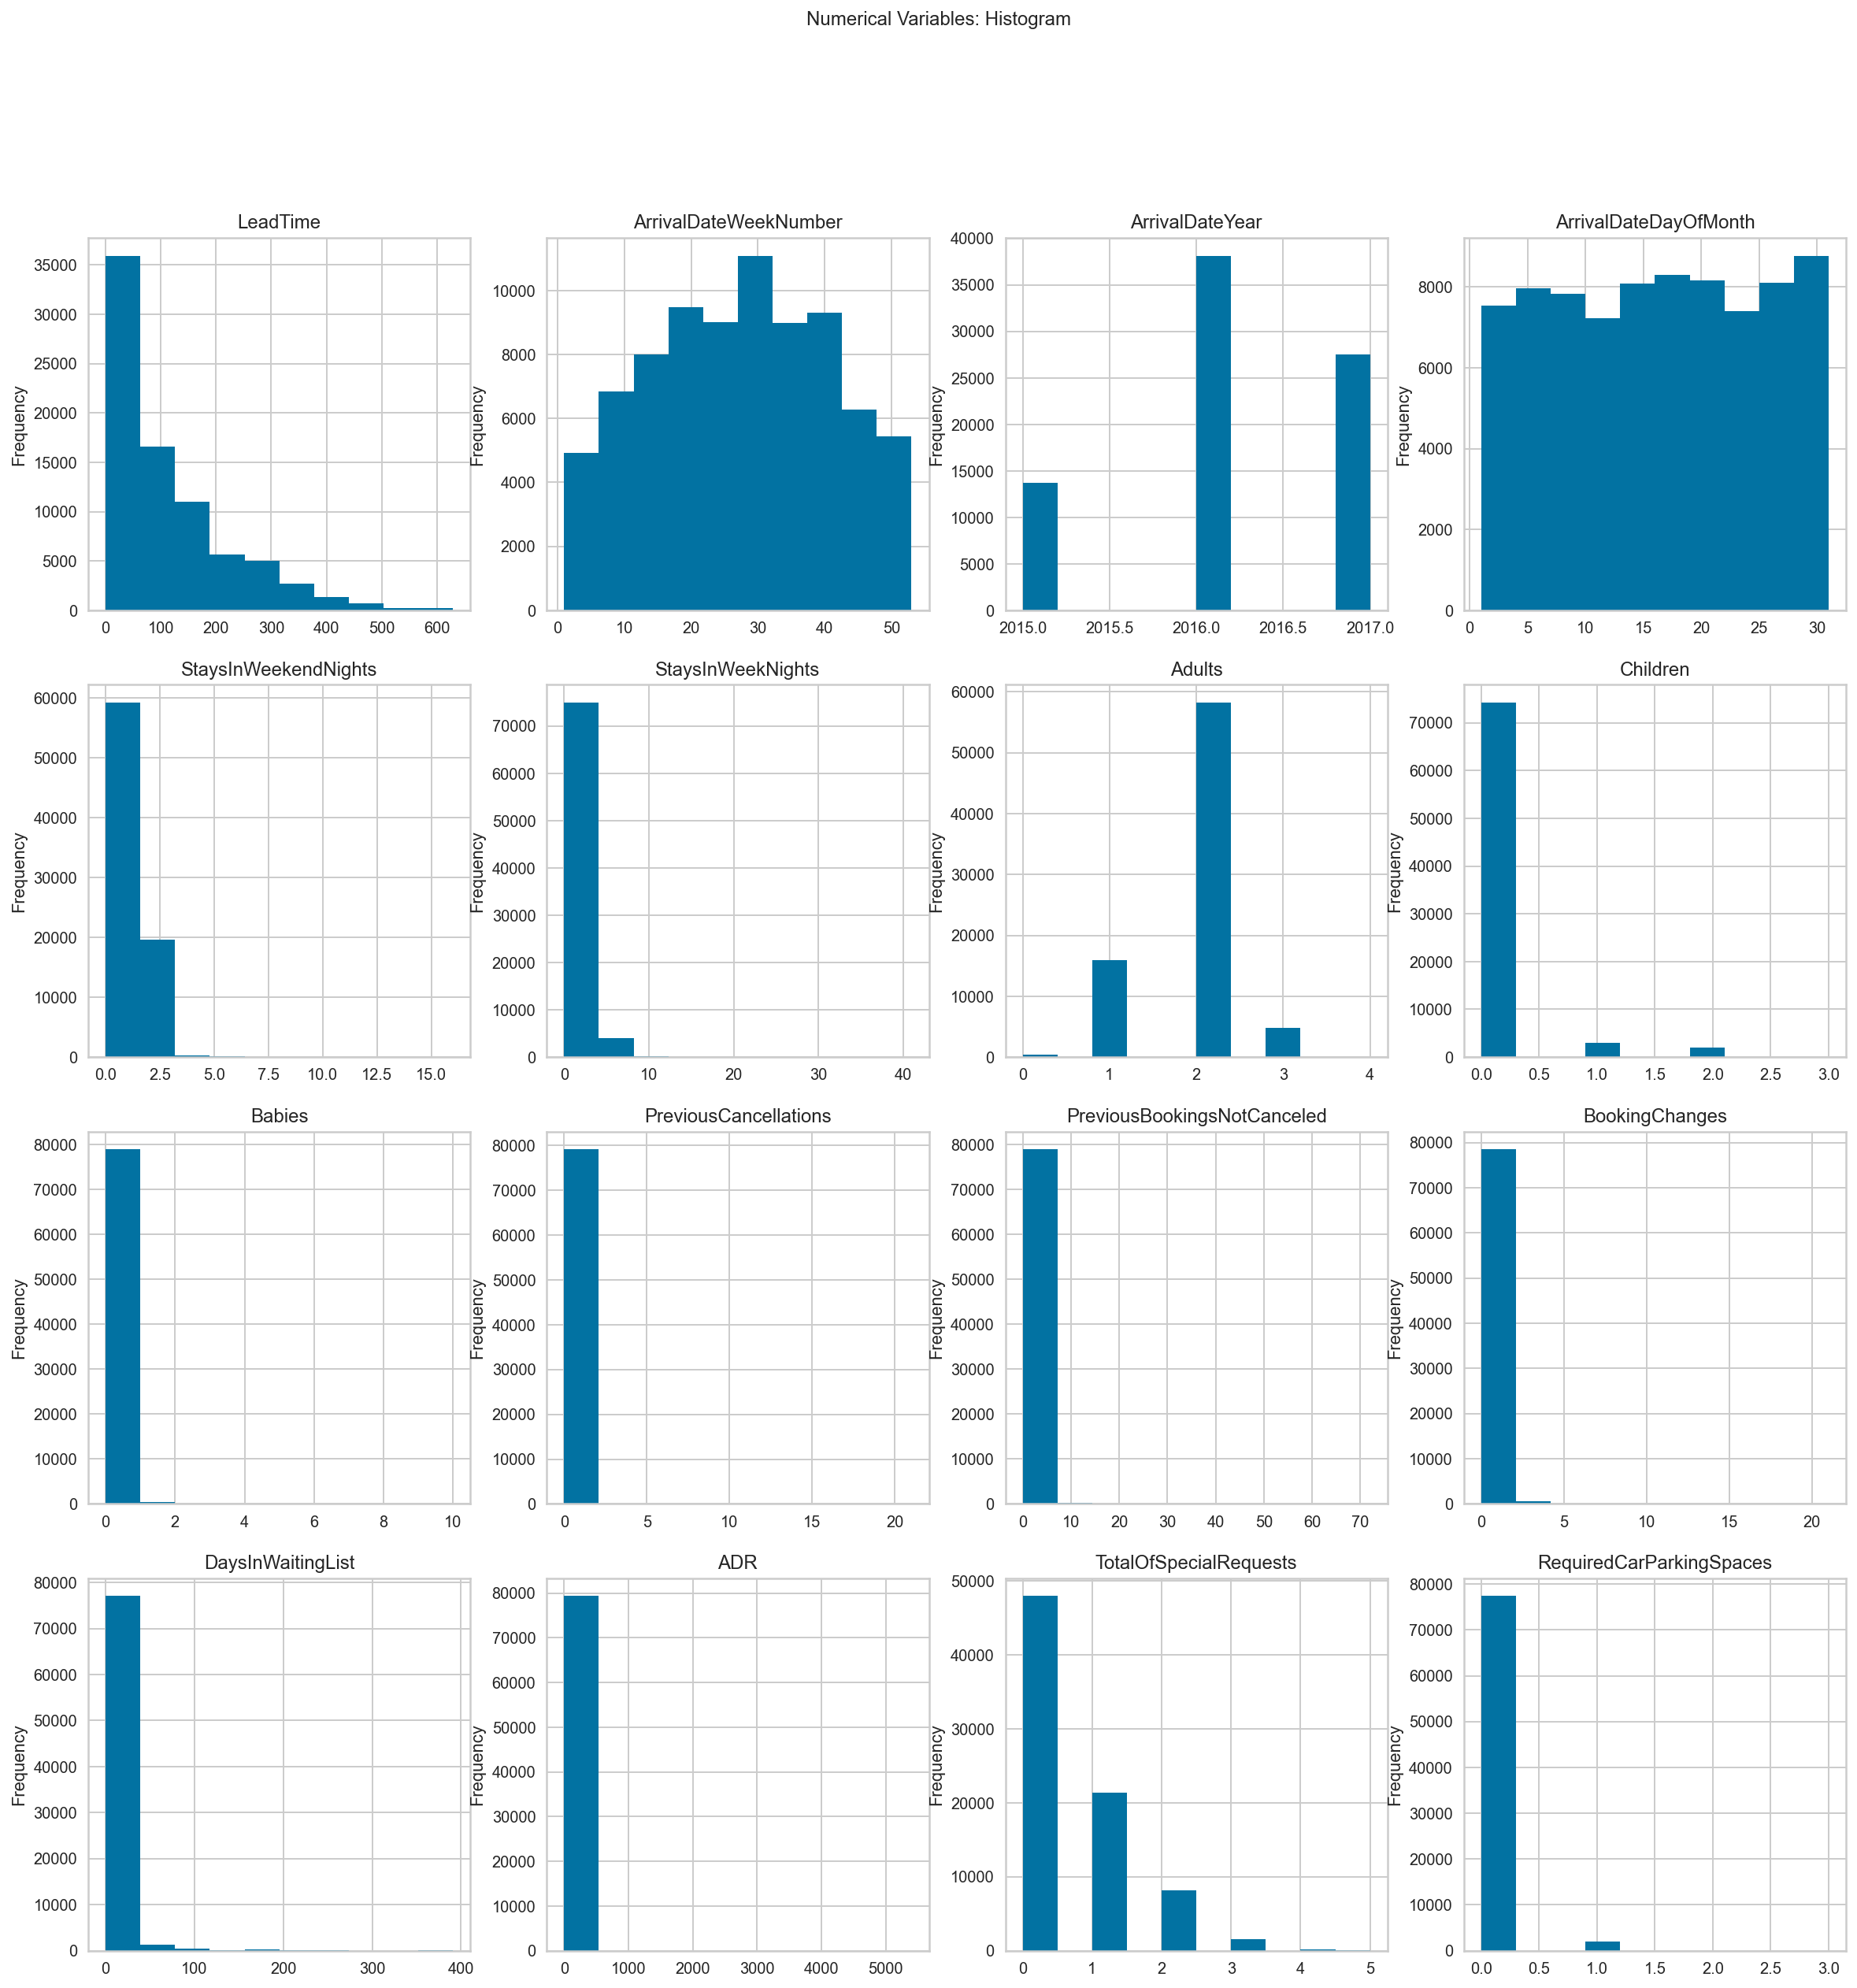

In [12]:
#Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features): 
    df[feat].plot(kind="hist", ax=ax, title=feat, bins=10)

title = "Numerical Variables: Histogram"
plt.suptitle(title)

plt.show()

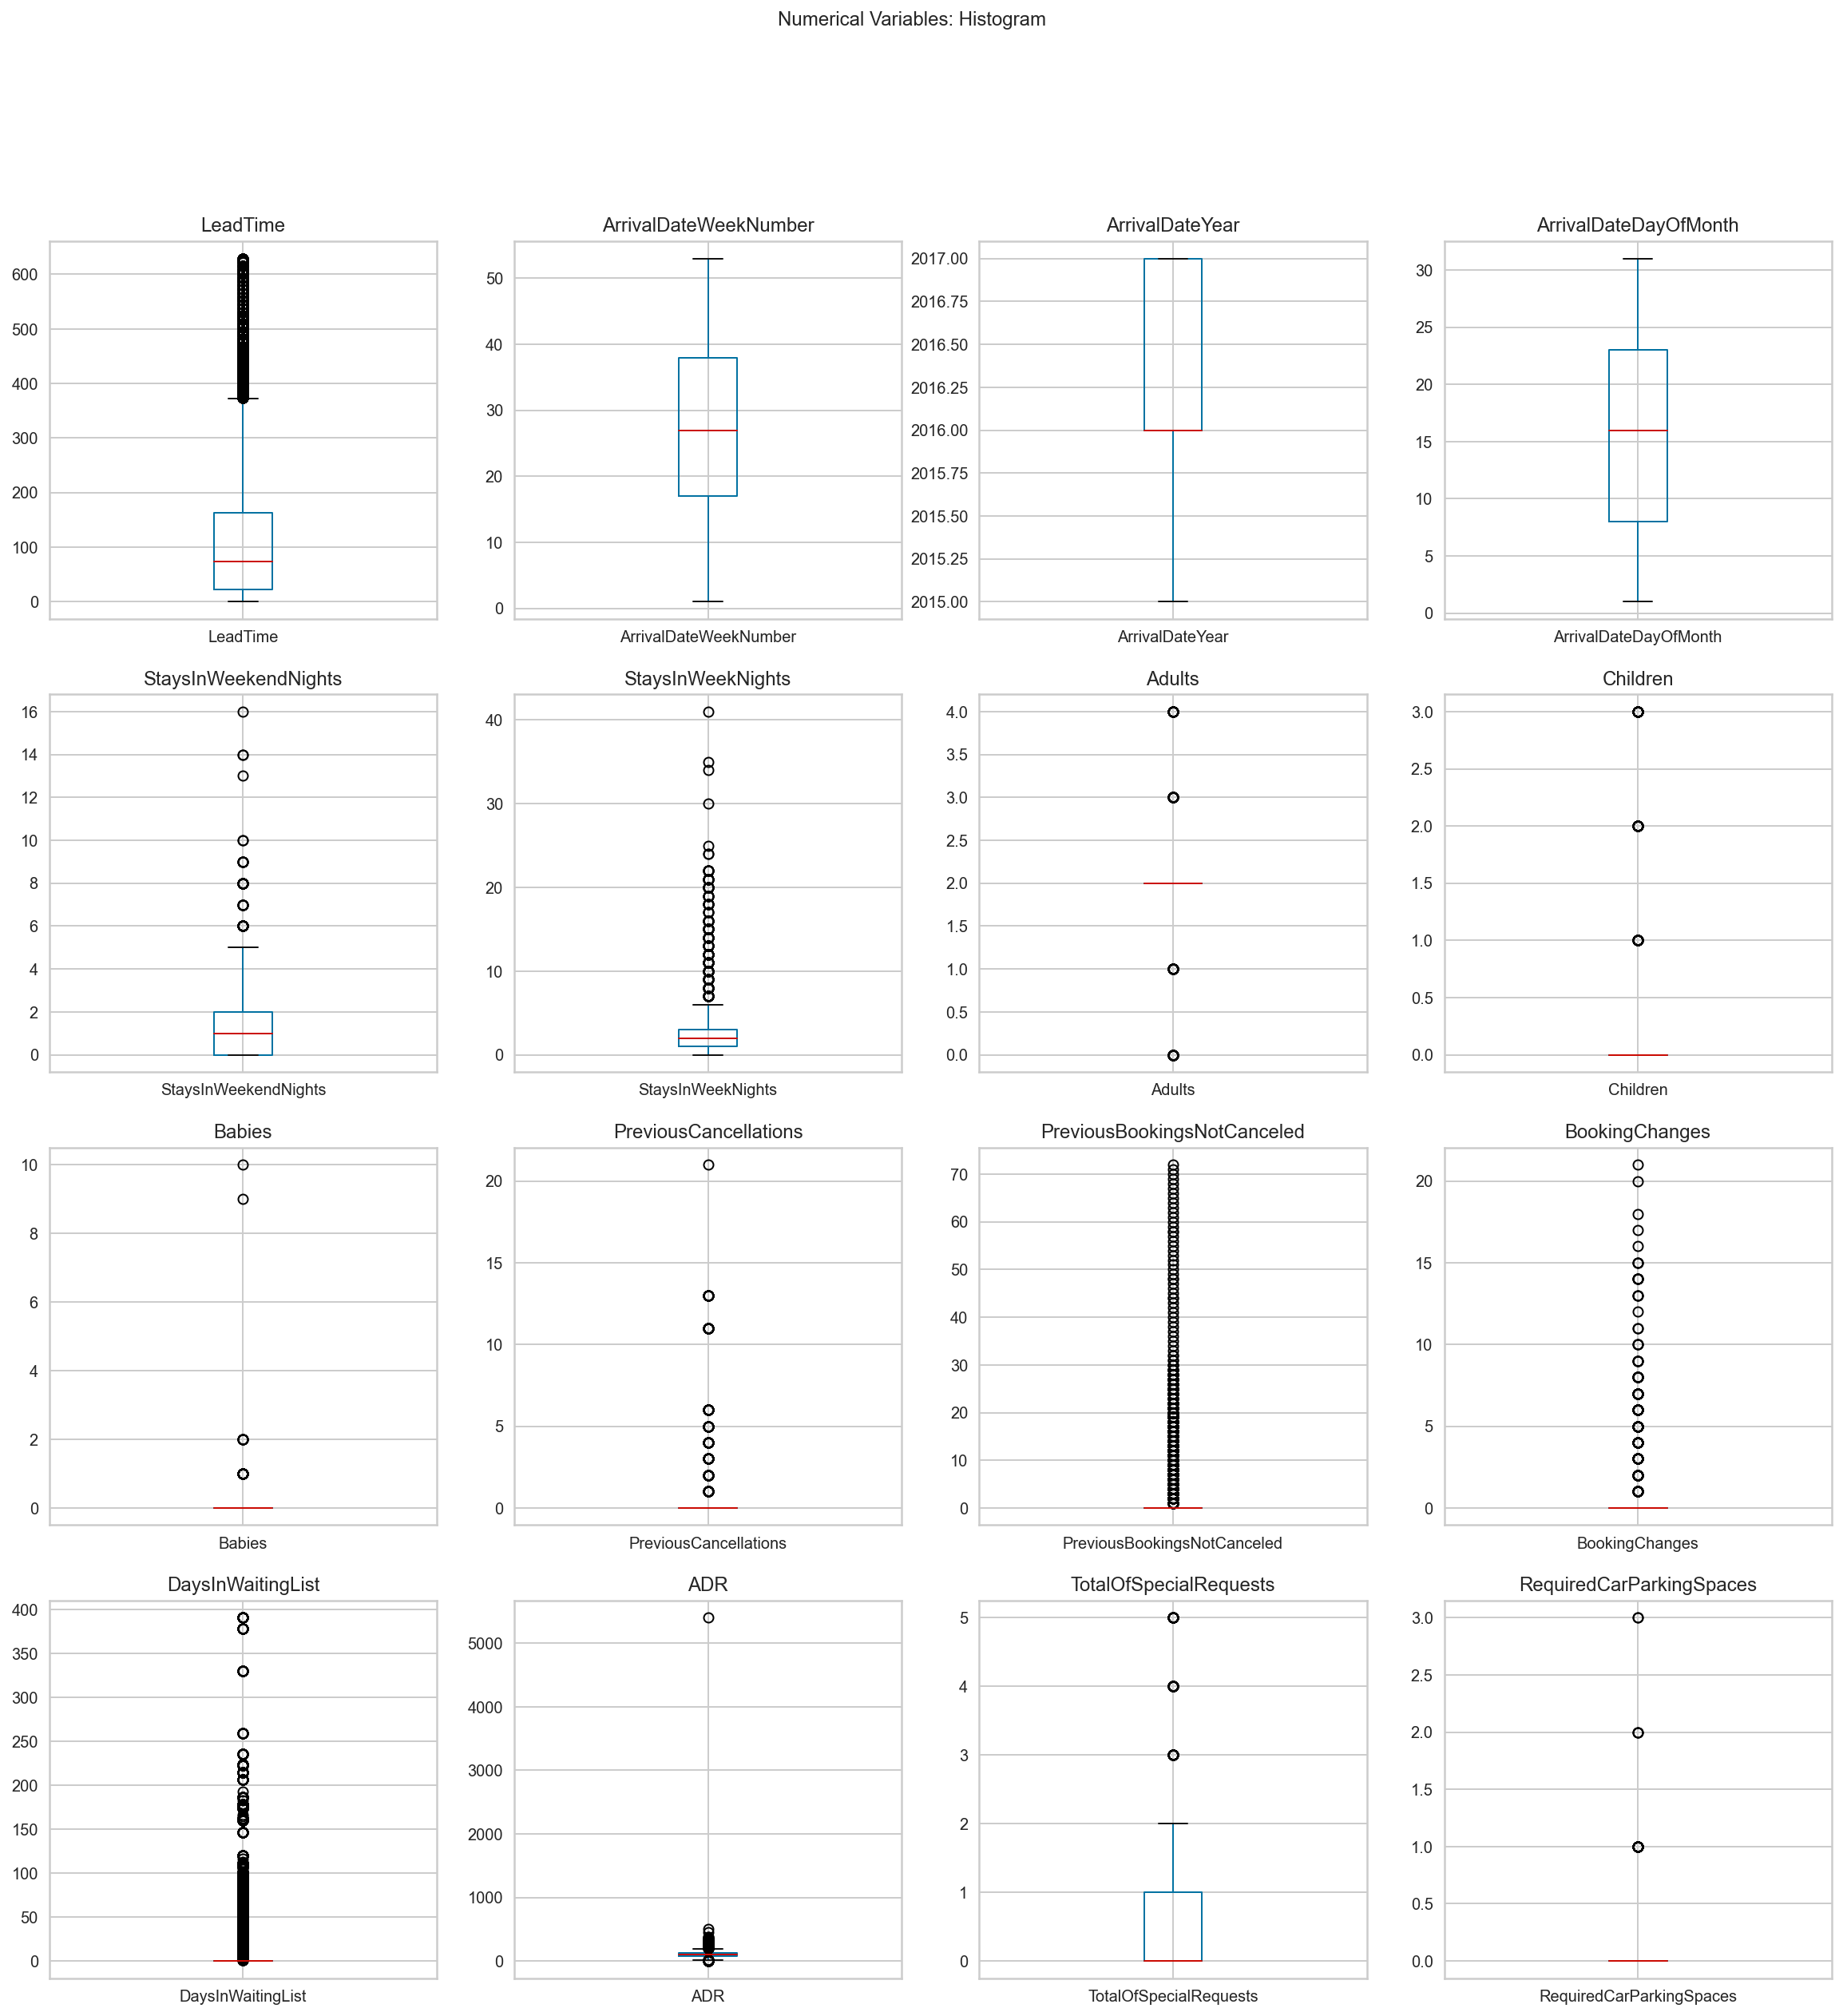

In [13]:
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features): 
    df[feat].plot(kind="box", ax=ax, title=feat)

title = "Numerical Variables: Histogram"
plt.suptitle(title)

plt.show()

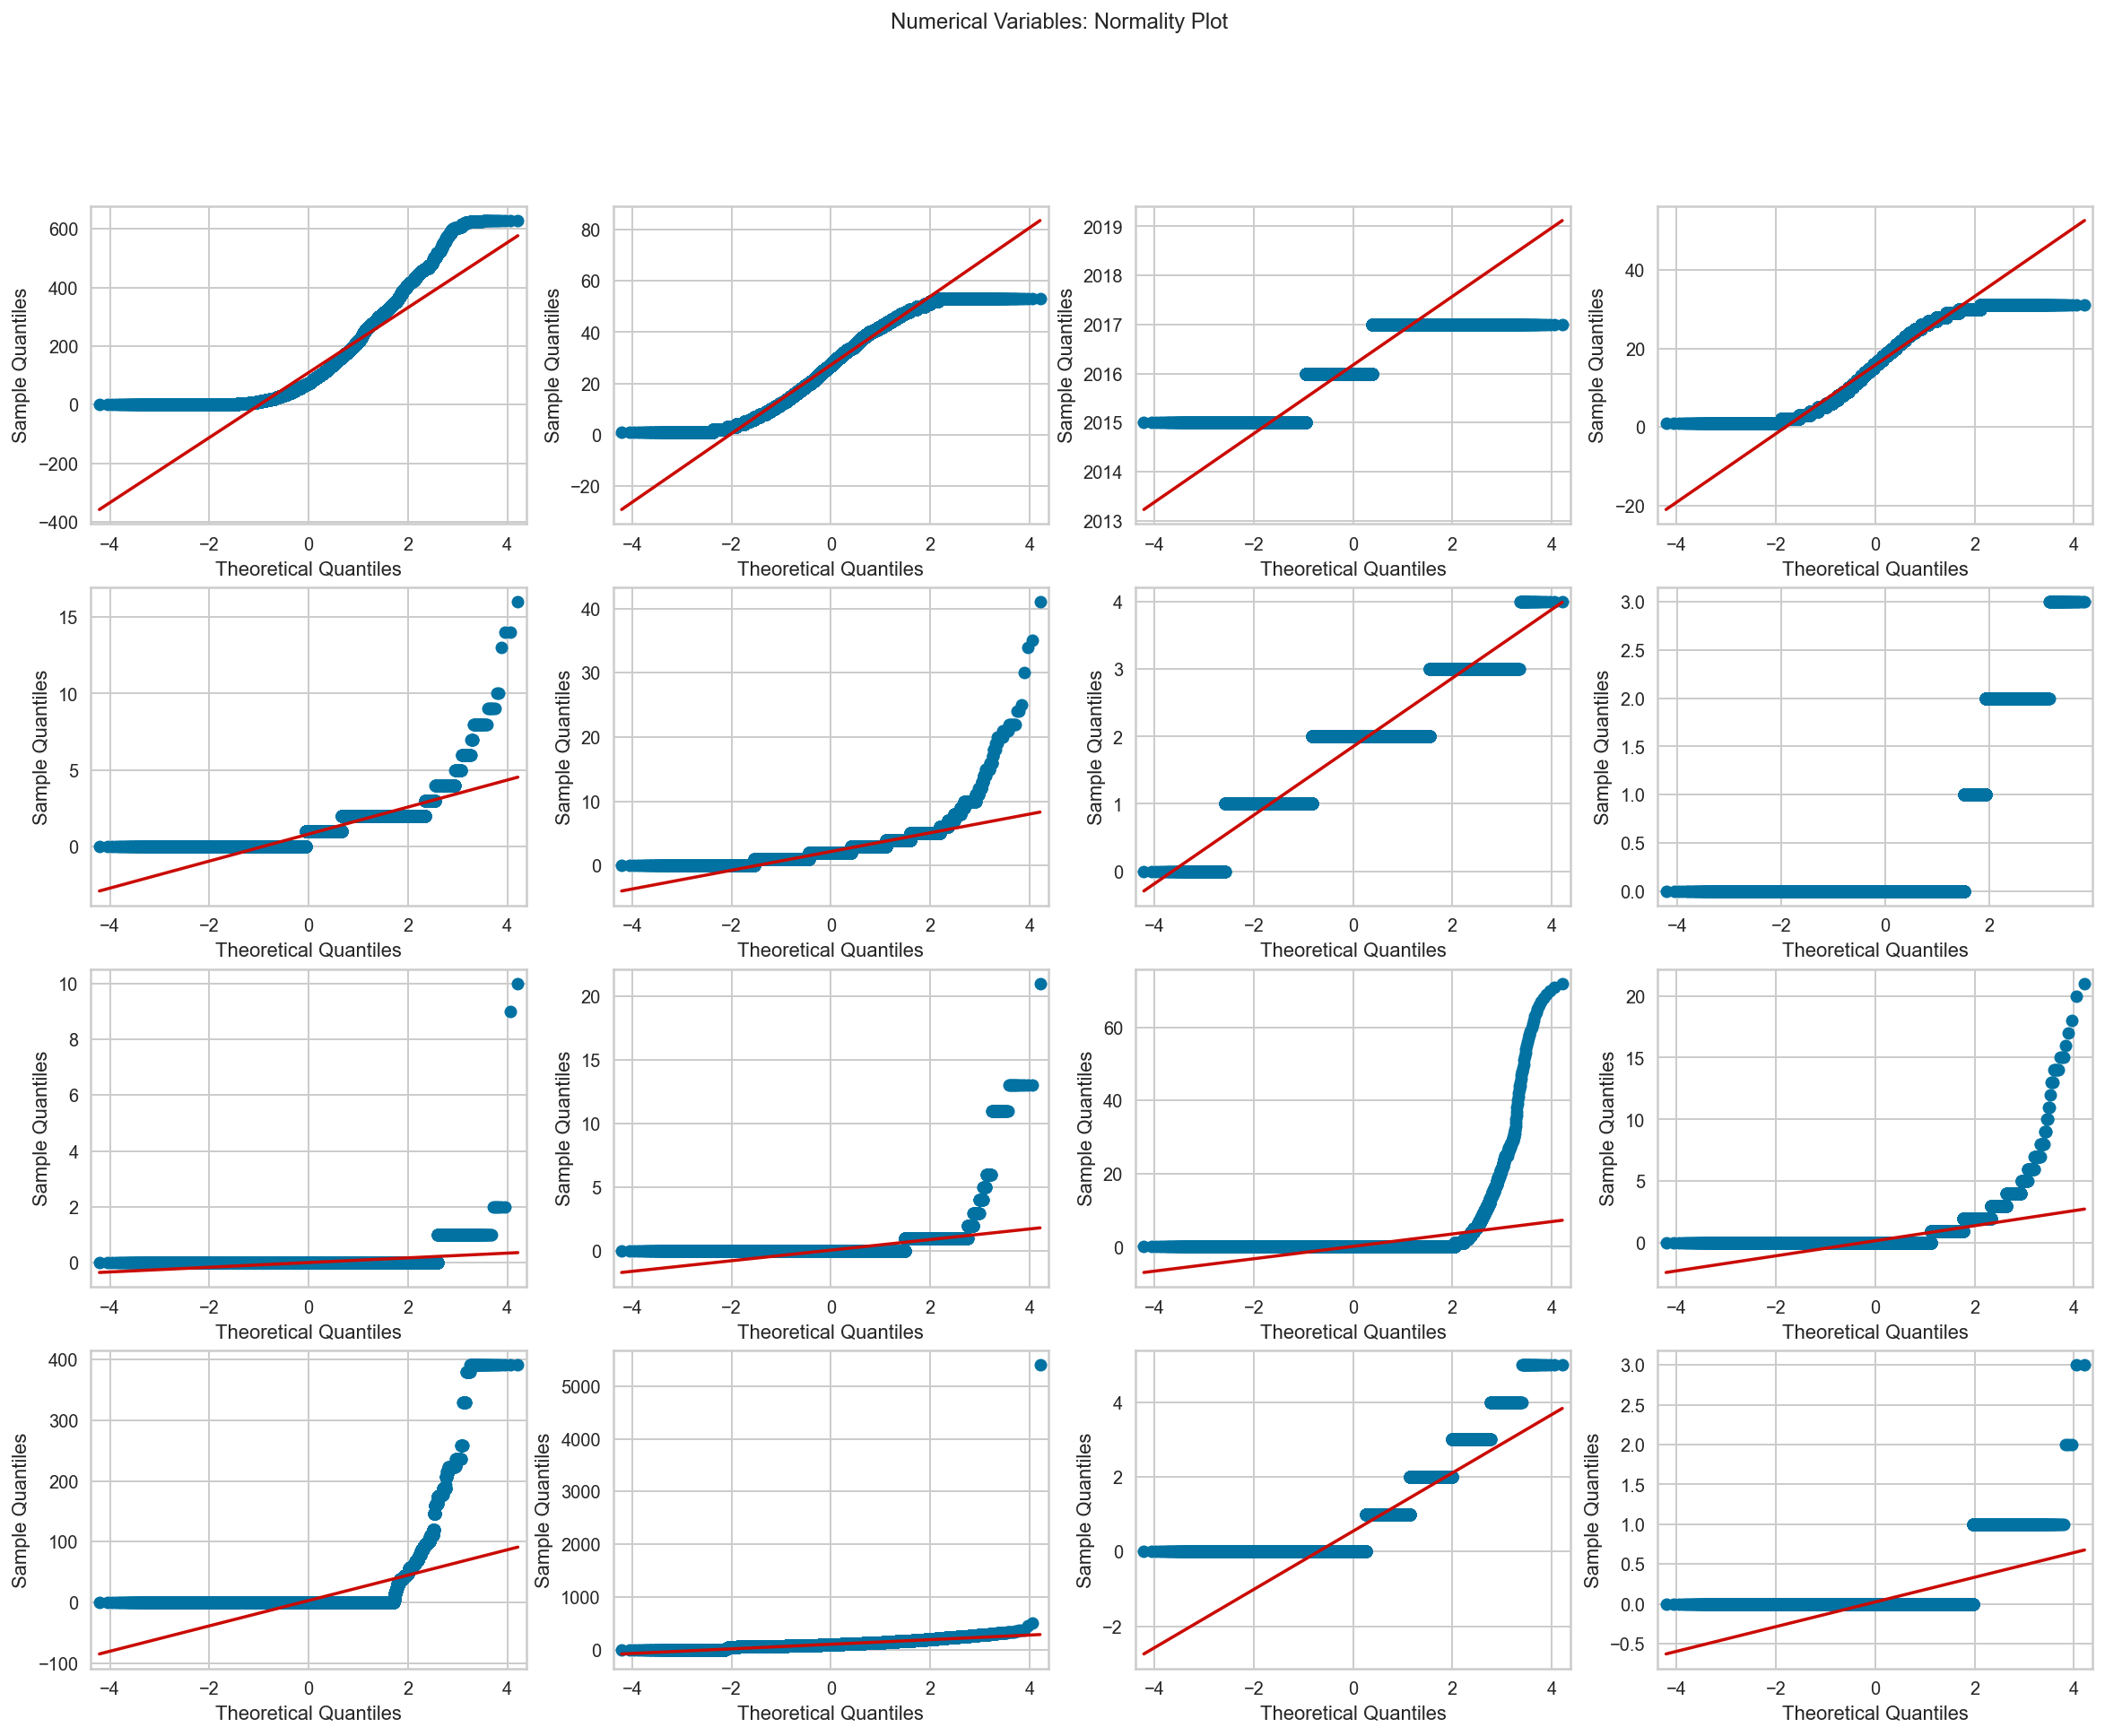

In [14]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features): 
    qqplot(df[feat], line="s", ax=ax)
    plt.suptitle(feat)

title = "Numerical Variables: Normality Plot"
plt.suptitle(title)

plt.show()

In [15]:
def box_plot_numerical(df, features, title):
    # Prepare figure
    fig, axes = plt.subplots(4, 4, figsize=(20, 20), constrained_layout=True)

    # Plot data
    for ax, f in zip(axes.flatten(), features):
        sns.boxplot(y=f, data=df, ax=ax, x='IsCanceled')
        ax.set_title(f)
        ax.set_ylabel('') 
        
    # Layout
    plt.suptitle(title, fontsize=16)
    plt.show()

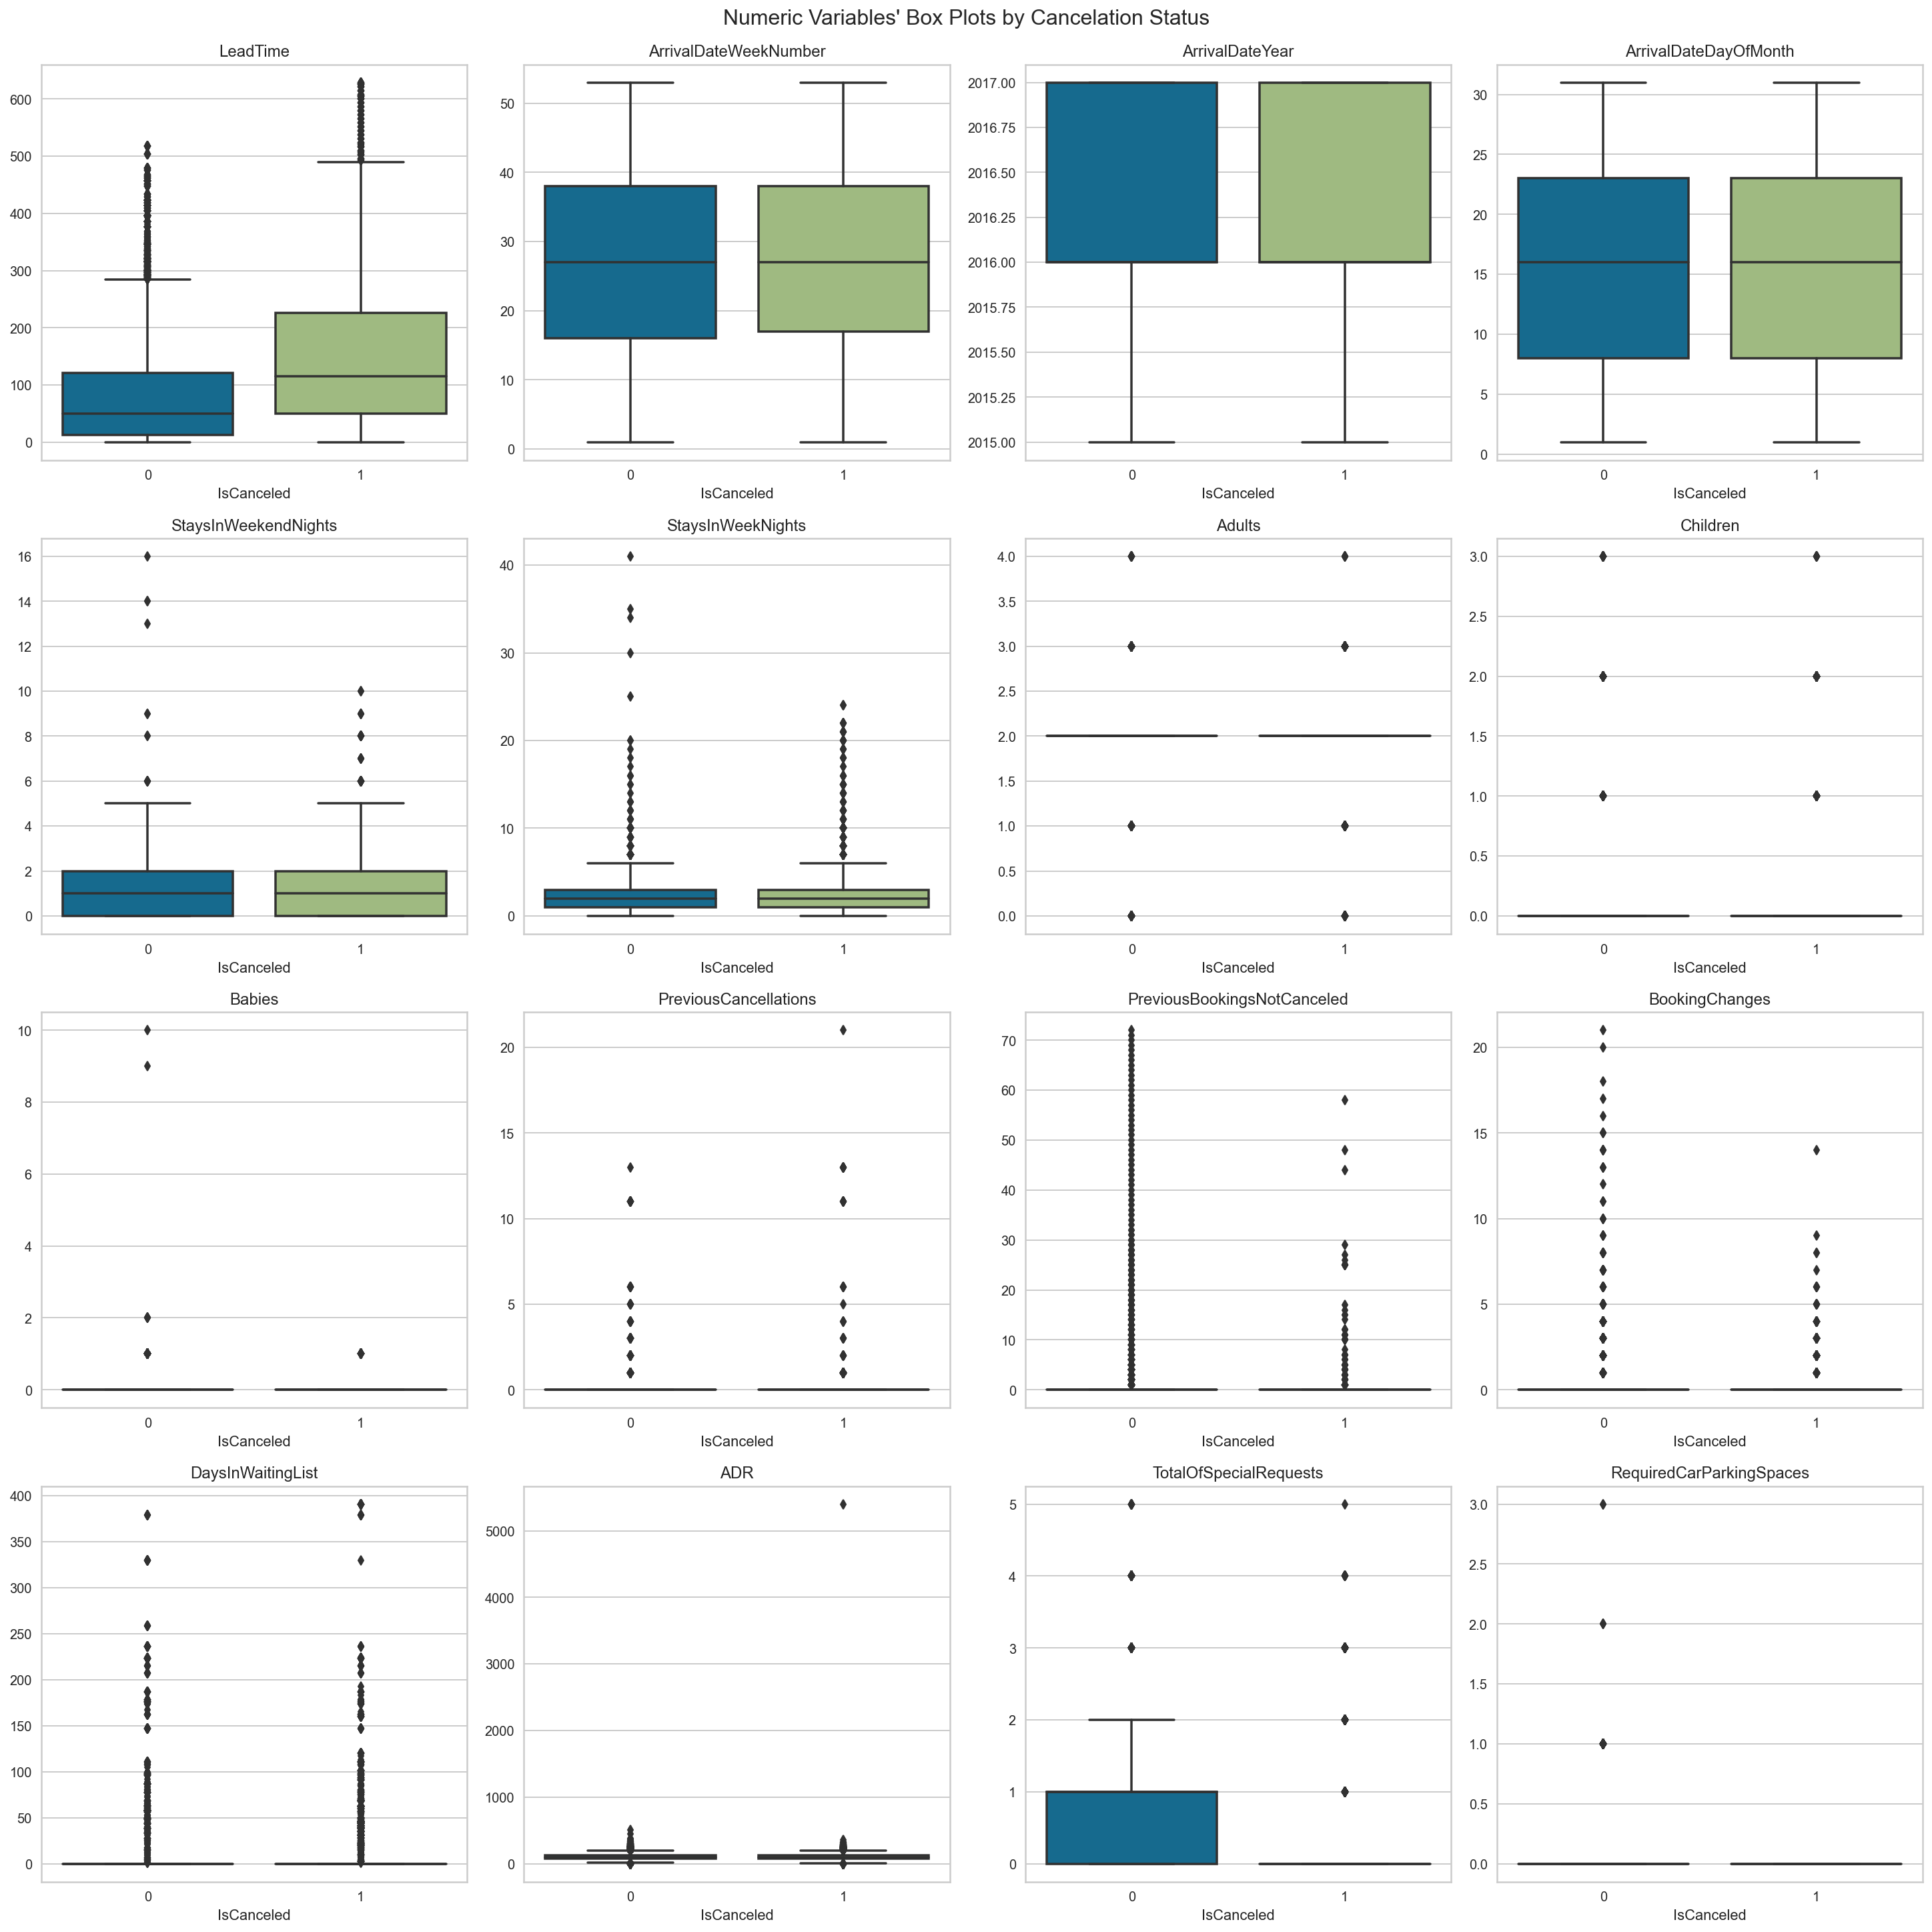

In [16]:
title = "Numeric Variables' Box Plots by Cancelation Status"

# features to plot
plot_features = metric_features

box_plot_numerical(df, plot_features, title)

AttributeError: module 'seaborn' has no attribute 'histplot'

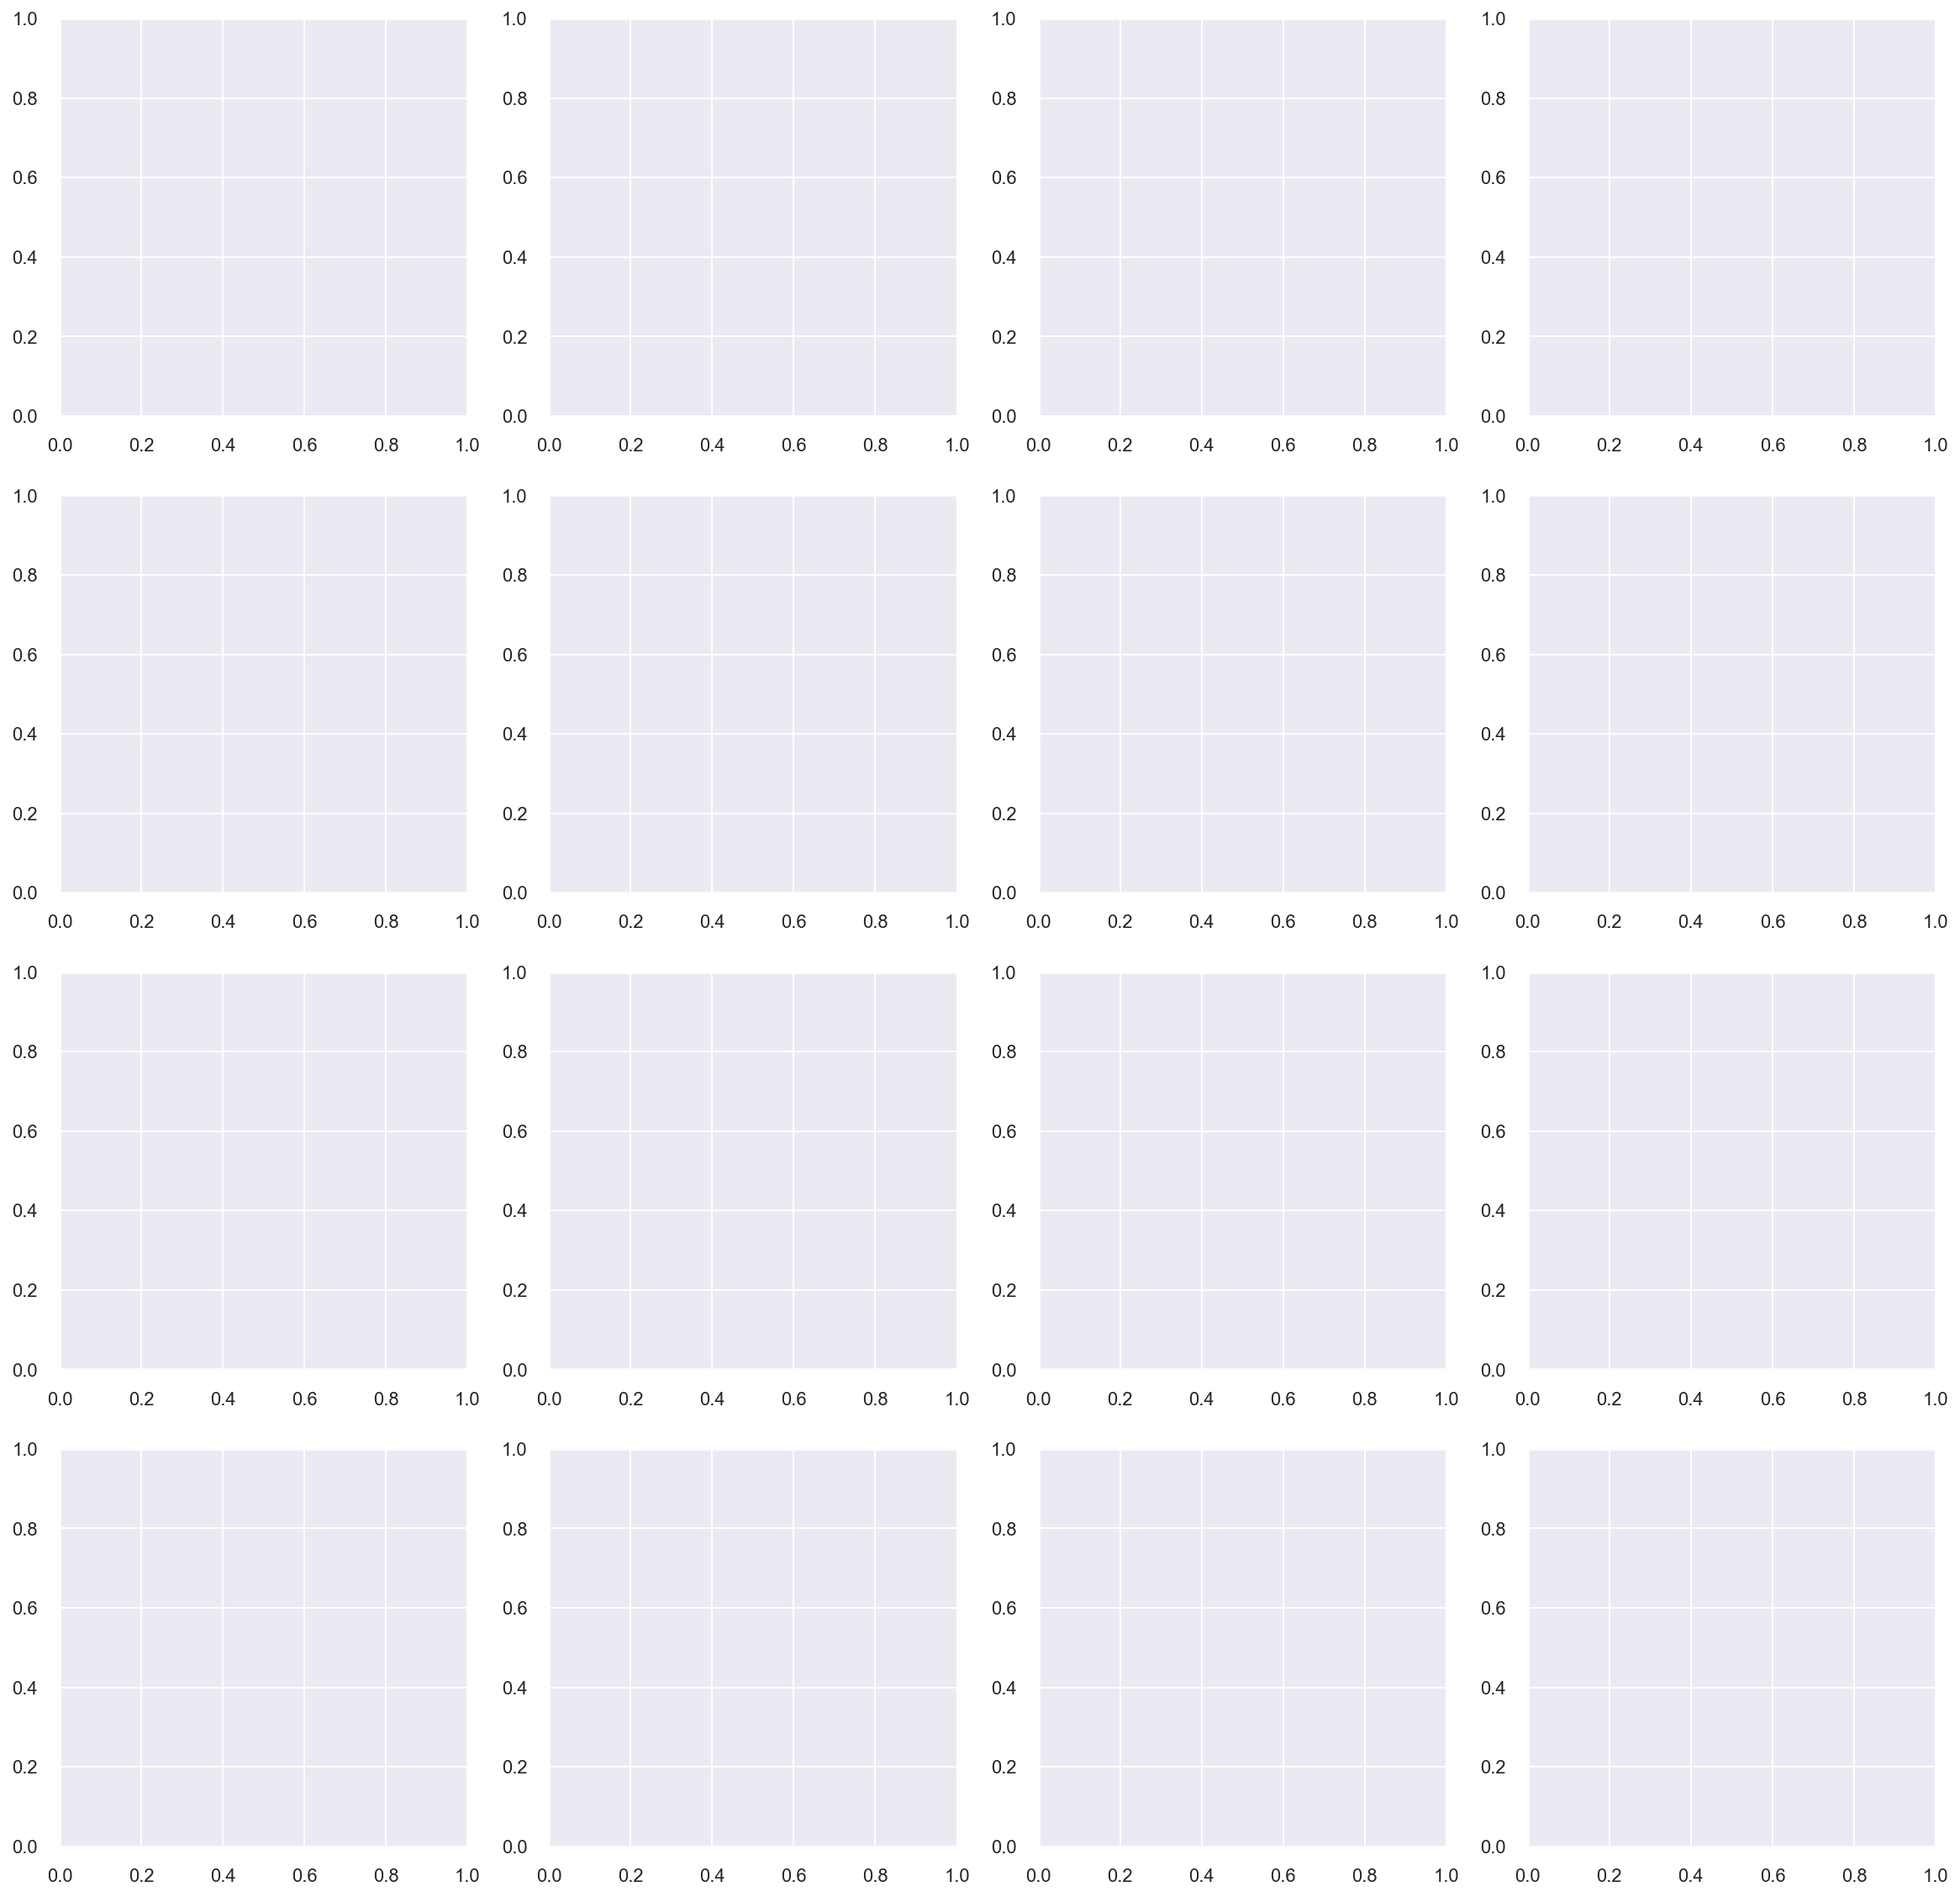

In [242]:
# All Numeric Variables' Box Plots in one figure
sns.set()

features = metric_features + ['IsCanceled']

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(20,20))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), features):
    sns.histplot(x=df[feat], hue=df['IsCanceled'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()


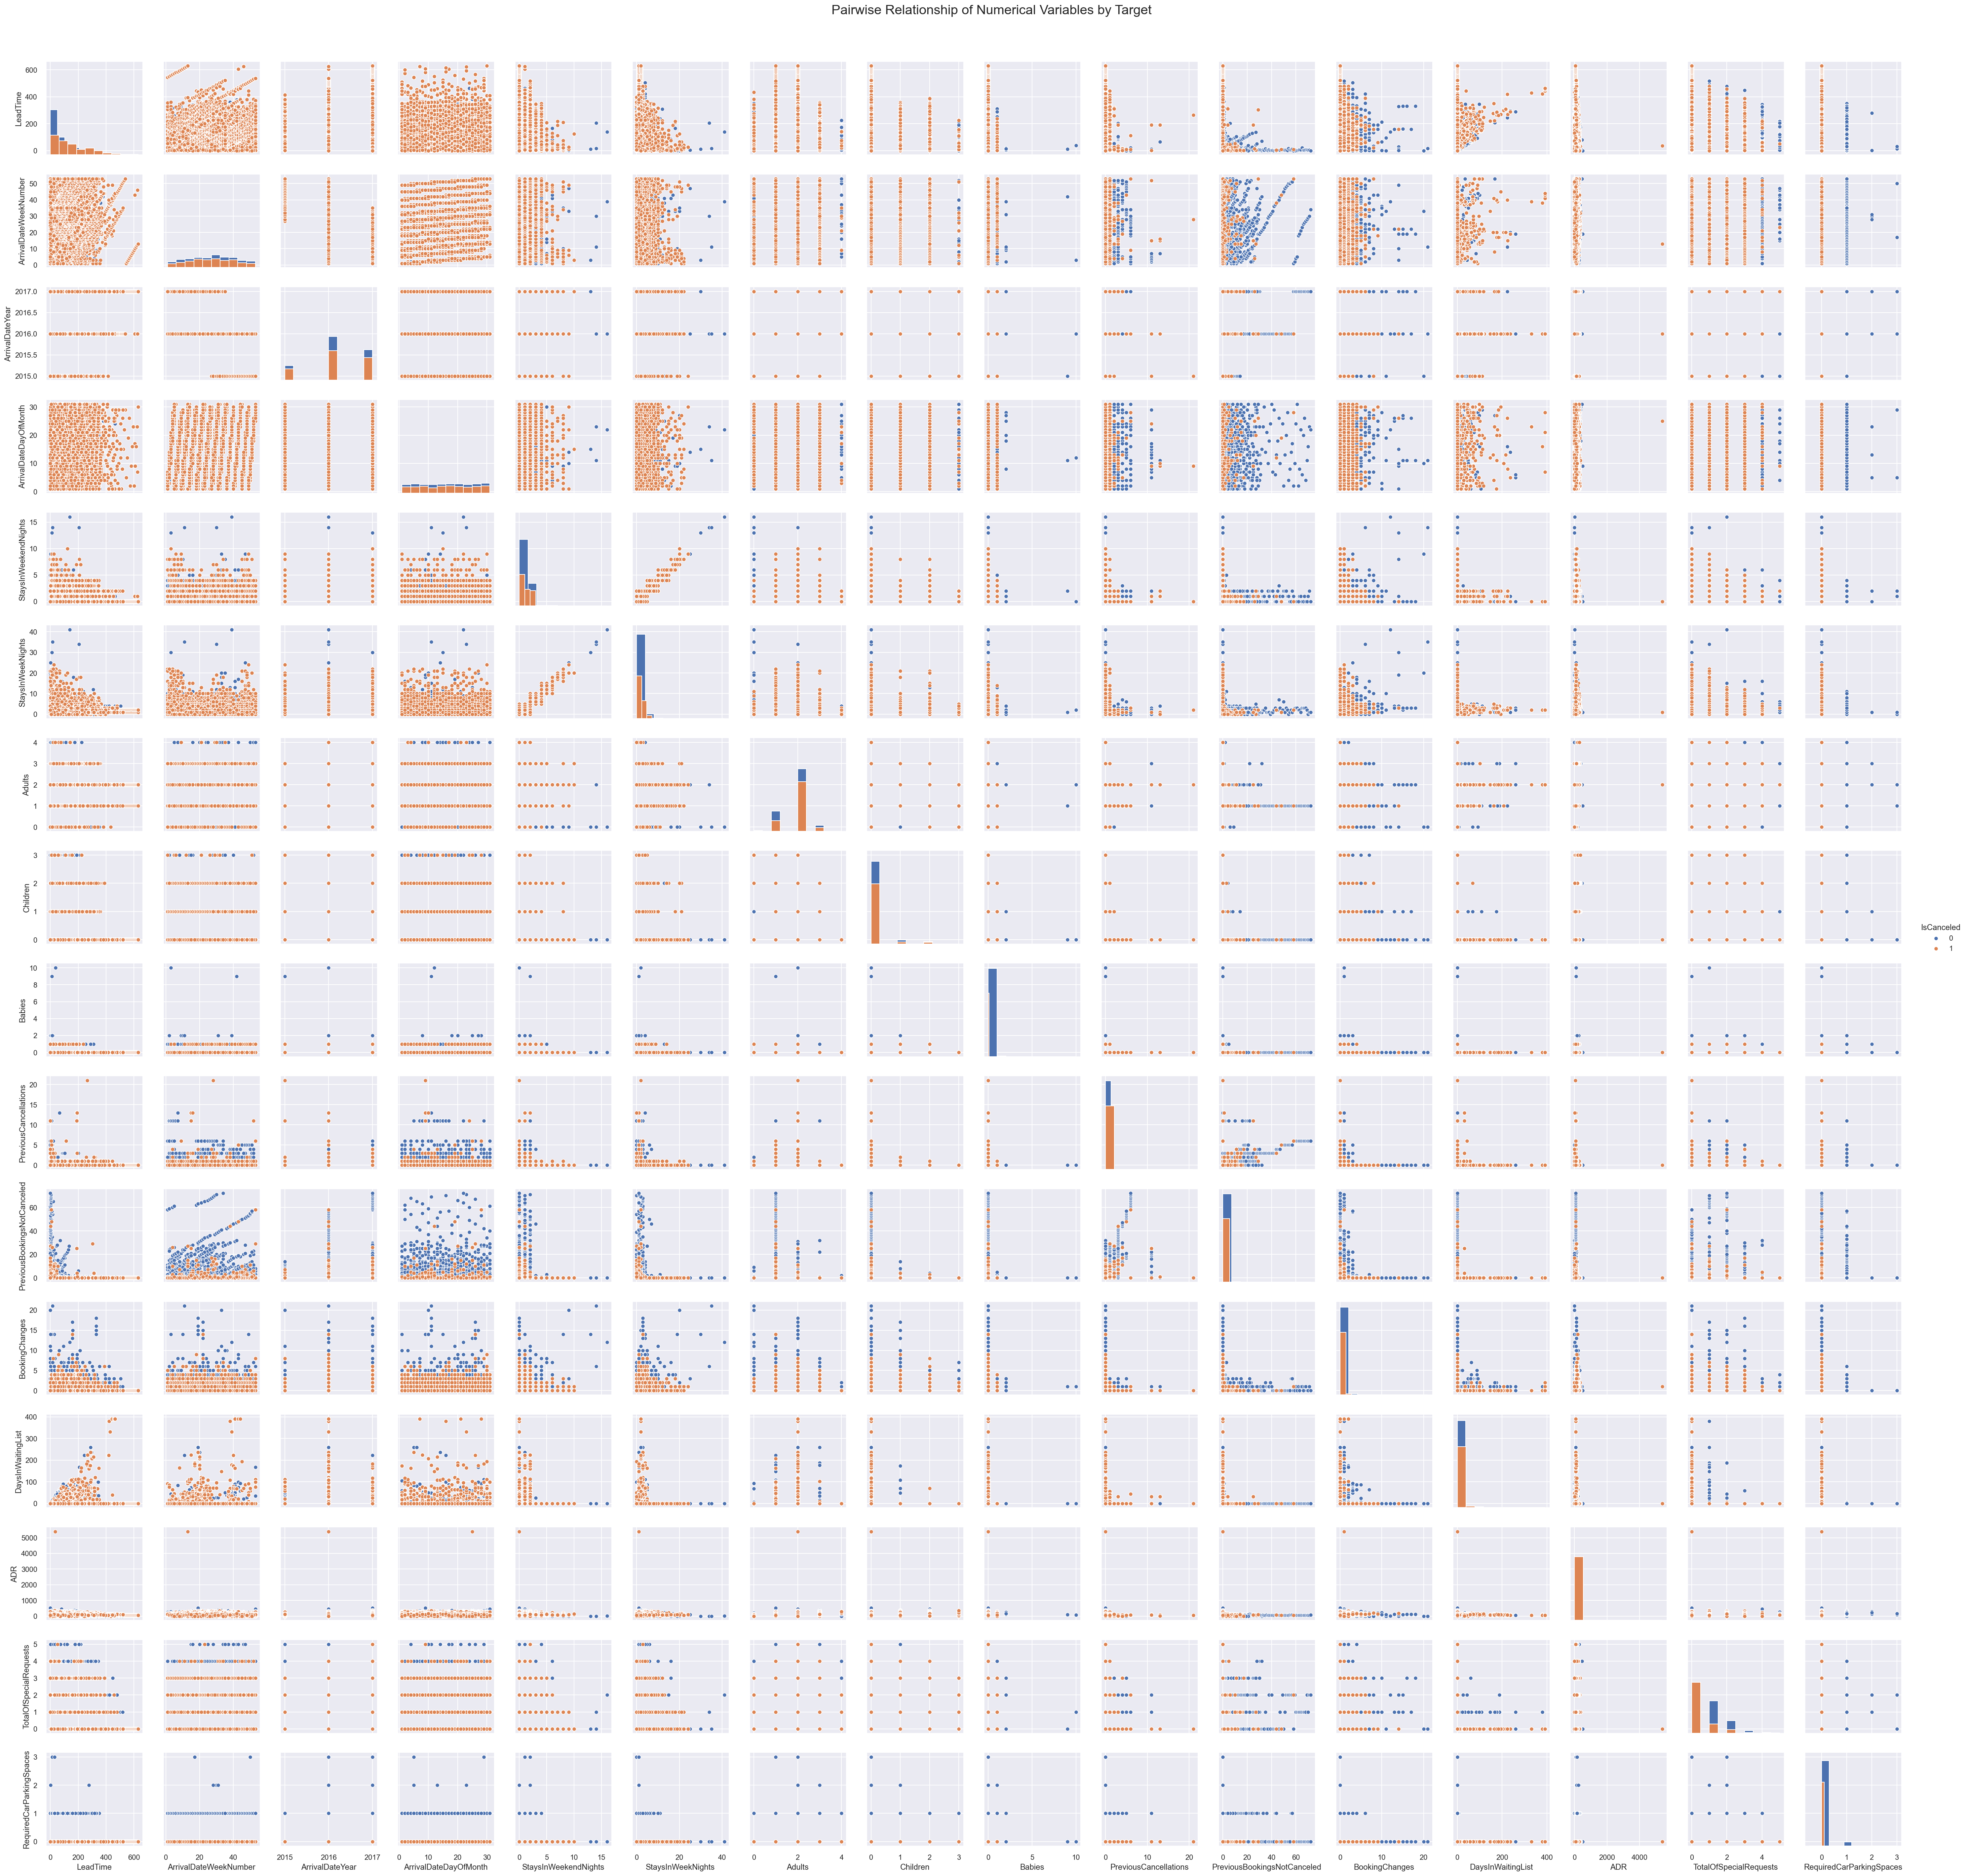

In [48]:
# Pairwise Relationship of Numerical Variables
sns.set()
features = metric_features + ['IsCanceled']

# Setting pairplot
sns.pairplot(data=df[features], hue='IsCanceled', diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

plt.show()

In [17]:
def month_to_number(x):
    month_dic = {'January': 1,
                'February': 2,
                'March': 3,
                'April': 4,
                'May': 5,
                'June': 6,
                'July': 7,
                'August': 8,
                'Septmber': 9,
                'October': 10,
                'November': 11,
                'December': 12}
    return month_dic[x]

month_to_number('January')

1

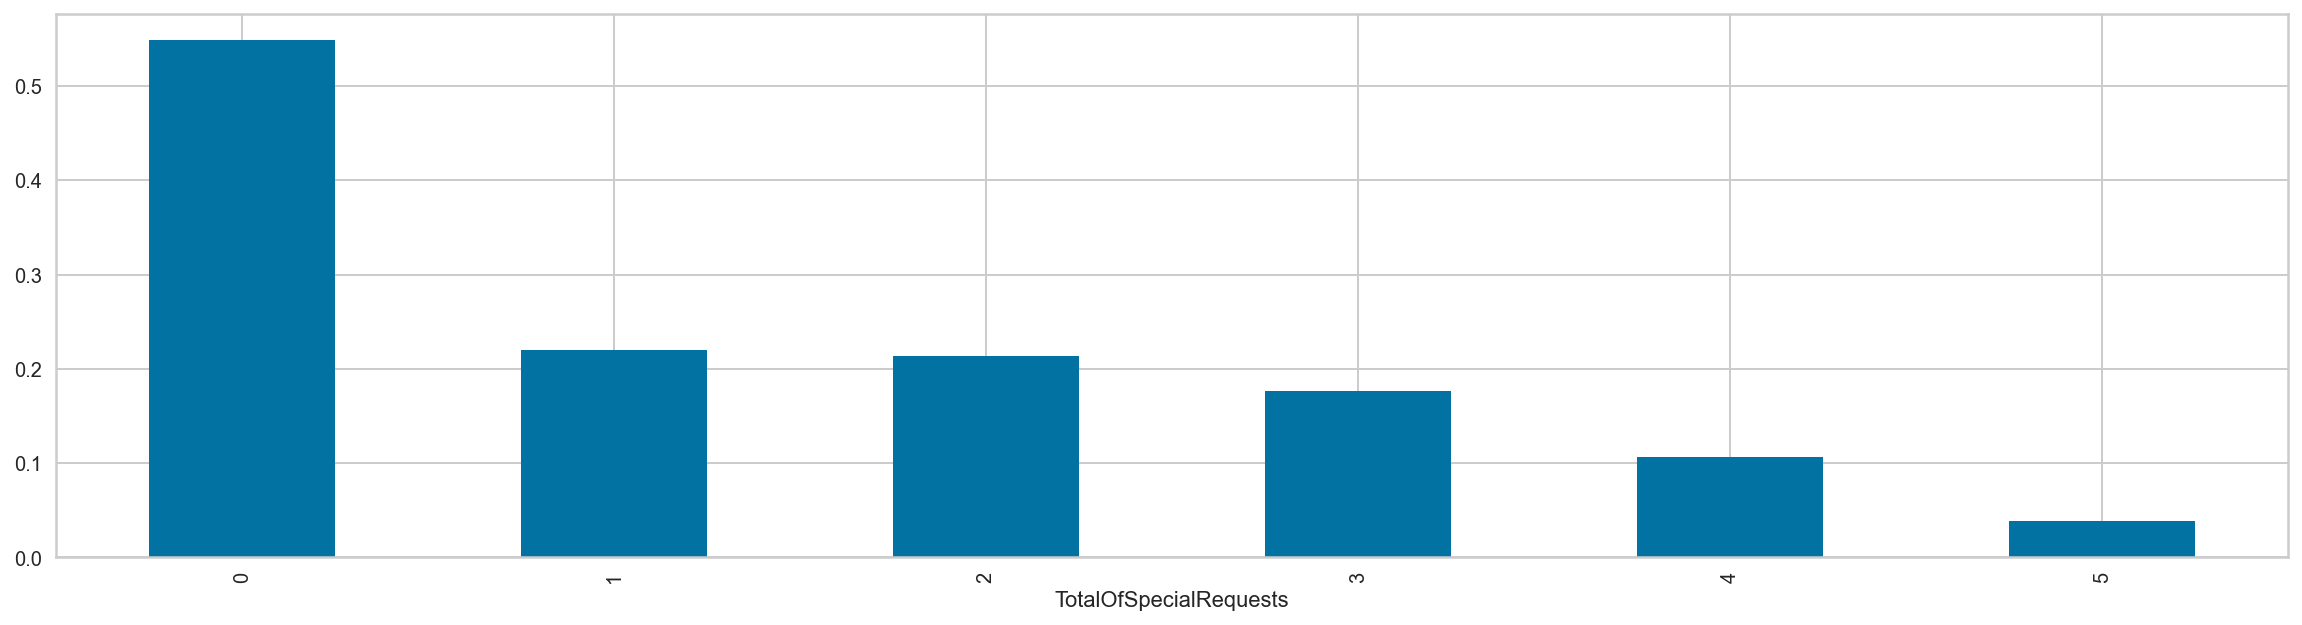

In [18]:
df.groupby('TotalOfSpecialRequests')['IsCanceled'].mean().sort_index(ascending=True).plot(kind='bar', figsize=(20, 5))


In [19]:
df['TotalOfSpecialRequests'].value_counts()

0    47957
1    21420
2     8142
3     1587
4      198
5       26
Name: TotalOfSpecialRequests, dtype: int64

<hr>
<a class="anchor" id="3.">
    
# 3. Initital notes based on data exploration
    
</a>



### Non-metric variables
- ArrivalDateMonth --> Probably drop and keep week number (redundant)
- Meal --> Drop, only FB seems to matter for cancelation and only 44 booking are FB
- Country --> Drop, bad quality (can only know after check-in
- MarketSegment --> Keep, seems to matter a lot
- DistributionChannel --> Drop, redundant with market segment but less useful information
- IsRepeatedGuest --> *drop due to redundancy with number of past booking canceled or not -- Keep, seems that repeated guests are less likely to cancel
- ReservedRoomType --> Potential drop
- DepositType --> Drop (quality issues)
- Agent --> Investigate further
- Company --> Drop
- CustomerType --> Keep
- ReservationStatus --> Drop (use to find out when it was canceled)
- ReservationStatusDate --> Drop (use to find out when it was canceled)

### Metric variables
- LeadTime --> Keep, booking made very much in advance seem to be more likely to be canceled
- ArrivalDateWeekNumber --> Keep
- ArrivalDateYear --> Drop
- RequiredCarParkingSpaces --> Drop
- ArrivalDateDayOfMonth --> Not sure
- StaysInWeekendNights --> Potentially merge to create 'NumberOfNights'
- StaysInWeekNights --> Potentially merge to create 'NumberOfNights'
- Adults --> Investigate Further, Probably drop
- Children --> Investigate further, Probably drop
- Babies --> Investigate further, Probably keep
- PreviousCancellations --> Keep, if they canceled before they are more likely to cancel again
- PreviousBookingsNotCanceled --> Keep, if they have 1 booking not canceled they are less likely to cancel
- BookingChanges --> Keep, if they made changes they are less likely to cancel
- DaysInWaitingList --> drop
- ADR --> drop
- TotalOfSpecialRequests --> Keep

<hr>
<a class="anchor" id="4.">
    
# 4.  Data Cleaning
    
</a>



<hr>
<a class="anchor" id="4.1.">
    
# 4.1. Missing Values
    
</a>

In [20]:
#Set missing values to mode 
df['Children'] = df['Children'].fillna(0)
df['Country'] = df['Country'].fillna(df['Country'].mode)

In [21]:
df.isna().sum().sort_values()

IsCanceled                     0
TotalOfSpecialRequests         0
RequiredCarParkingSpaces       0
ADR                            0
CustomerType                   0
DaysInWaitingList              0
Company                        0
Agent                          0
DepositType                    0
BookingChanges                 0
AssignedRoomType               0
ReservedRoomType               0
PreviousBookingsNotCanceled    0
PreviousCancellations          0
ReservationStatus              0
IsRepeatedGuest                0
MarketSegment                  0
Country                        0
Meal                           0
Babies                         0
Children                       0
Adults                         0
StaysInWeekNights              0
StaysInWeekendNights           0
ArrivalDateDayOfMonth          0
ArrivalDateWeekNumber          0
ArrivalDateMonth               0
ArrivalDateYear                0
LeadTime                       0
DistributionChannel            0
Reservatio

<hr>
<a class="anchor" id="4.2.">
    
# 4.2. Remove Outliers
    
</a>




### Handling Multivariate OUtliers with DBScan

In [22]:
initial_num_rows = df.shape[0]

In [23]:
# Since we will use the original data and it isn't standardized
std_data = prep.StandardScaler().fit_transform(df[metric_features])
lof = neighb.LocalOutlierFactor(n_neighbors=50, contamination="auto")
outlof = lof.fit_predict(std_data)
lof_scores = lof.fit(std_data).negative_outlier_factor_

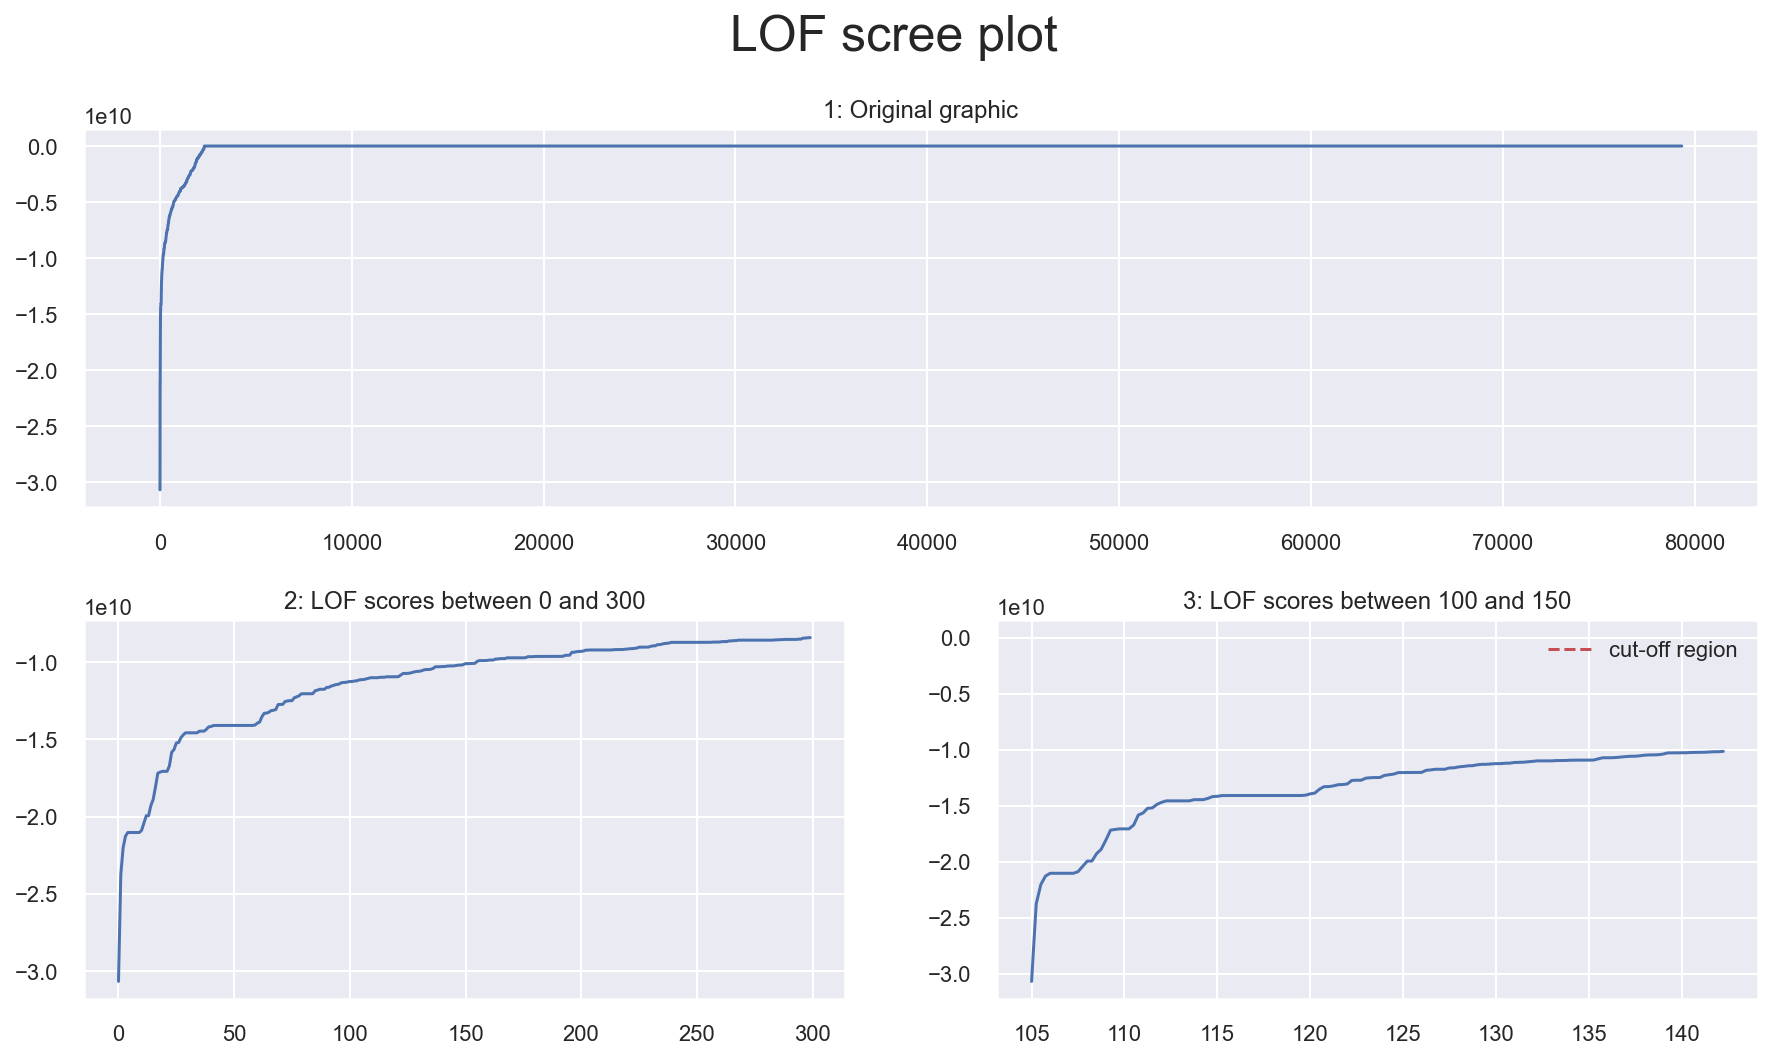

In [24]:
sns.set()
#figure
fig = plt.figure(figsize=(15,8))
fig.suptitle("LOF scree plot", fontsize=25)

#axes
gs = gspec.GridSpec(2,2)
ax1 = fig.add_subplot(gs[0,:]) # First row, first column
ax2 = fig.add_subplot(gs[1,0]) # First row, second column
ax3 = fig.add_subplot(gs[1,1]) # First row, all columns

#data
ax1.plot(np.sort(lof_scores))
ax2.plot(np.sort(lof_scores)[:300])
ax3.plot(np.sort(lof_scores)[0:150], data= np.arange(100, 150, 5))

#layout
ax1.set_title("1: Original graphic")
ax2.set_title("2: LOF scores between 0 and 300")
ax3.set_title("3: LOF scores between 100 and 150")
ax3.set_xticklabels(list(map(str,range(100,150,5)))) #adjust ax3 x axis tick labels
ax3.vlines(x=[50,70], ymin=-10, ymax=-1, color="r", linestyles ="dashed", label="cut-off region")
ax3.legend()
plt.subplots_adjust(hspace=0.3)

plt.show()

In [25]:
top_lof_scores = df.index.isin(lof_scores.argsort()[:120]+1)
top_lof_scores.sum()

120

In [26]:
df = df[~top_lof_scores]

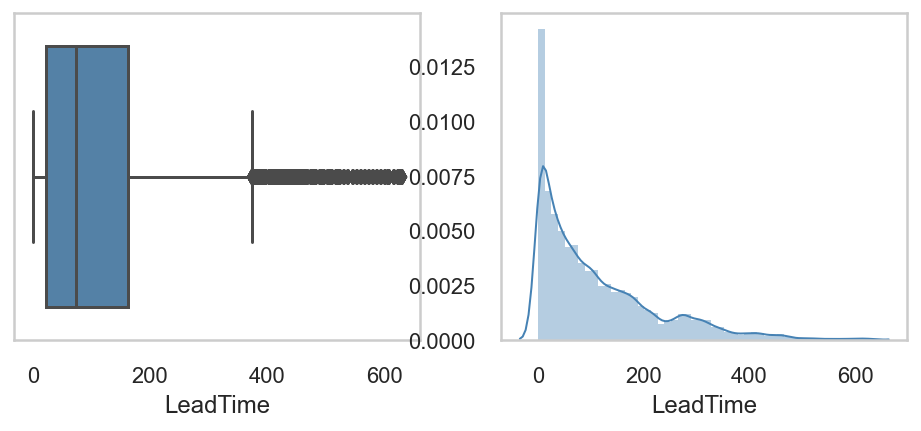

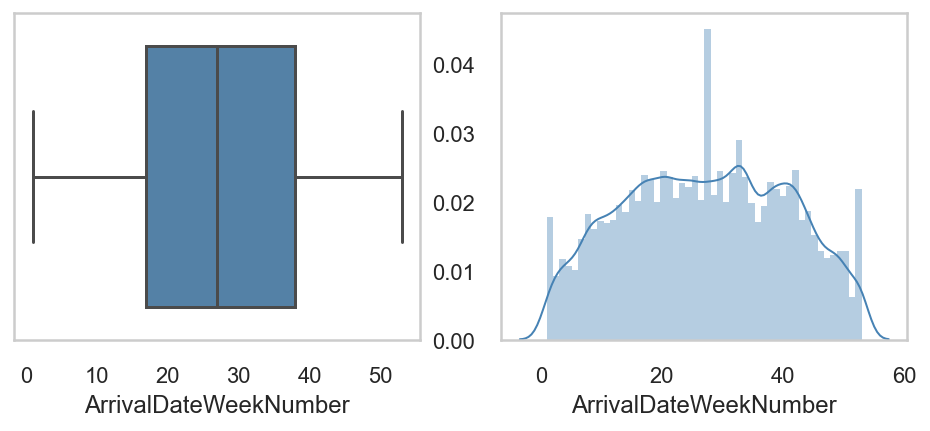

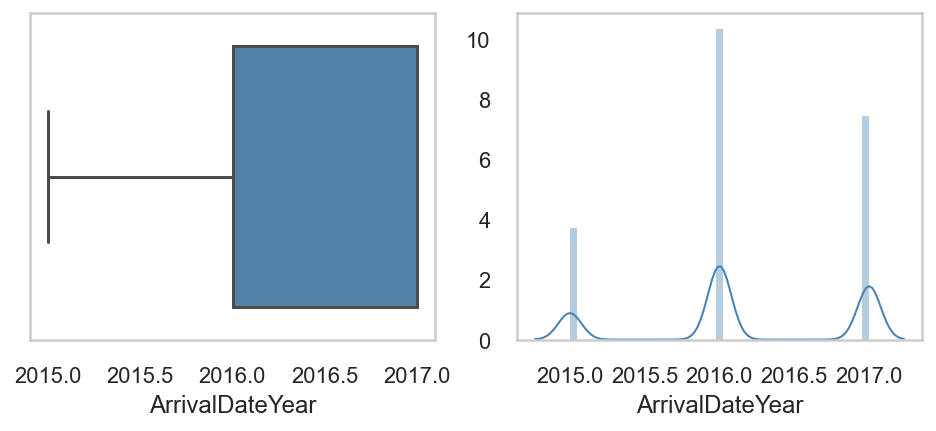

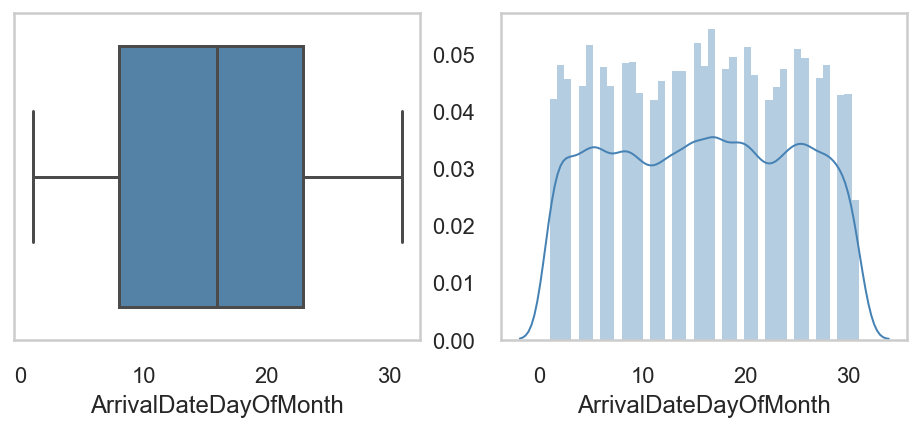

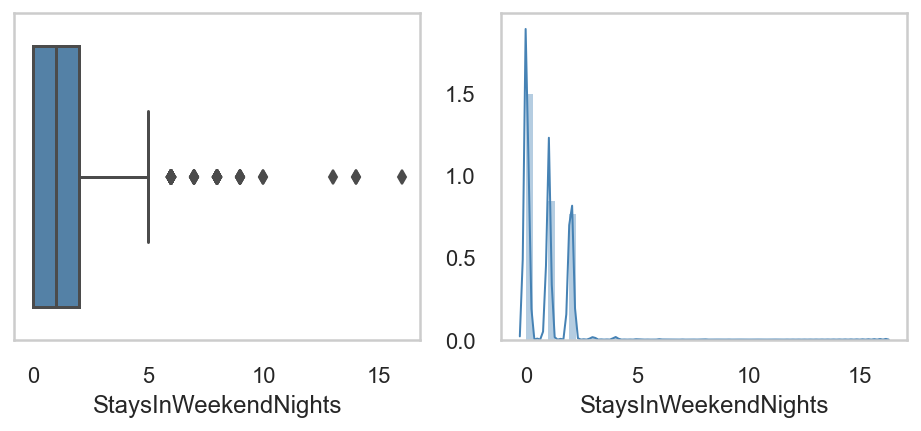

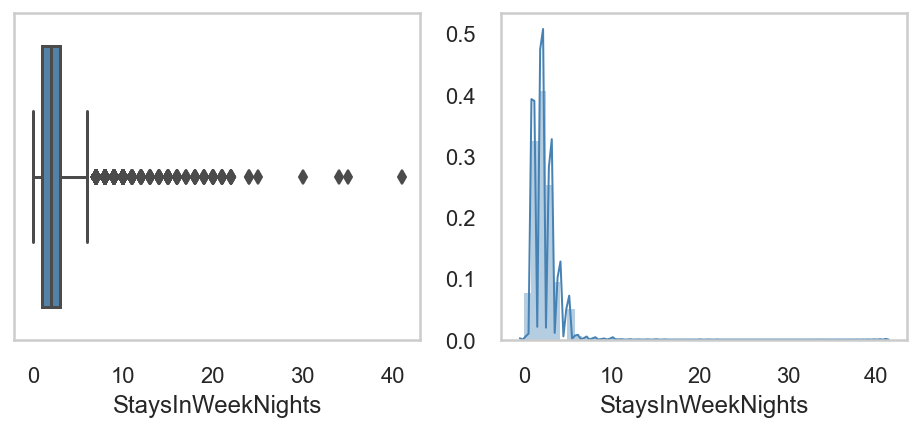

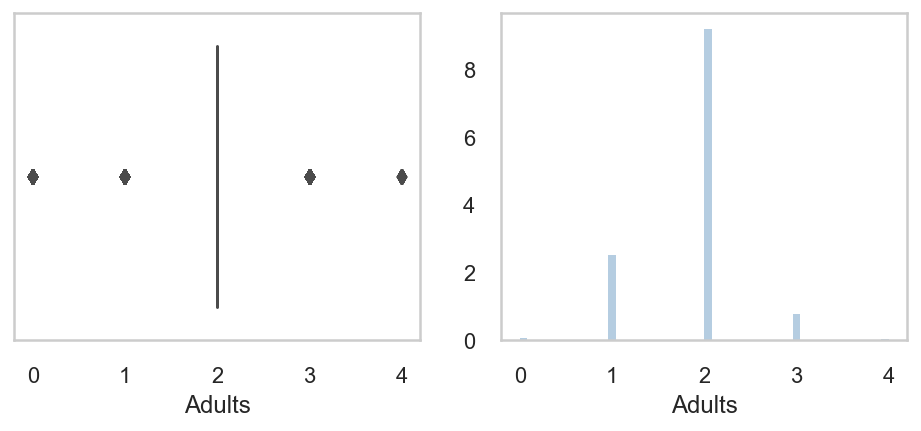

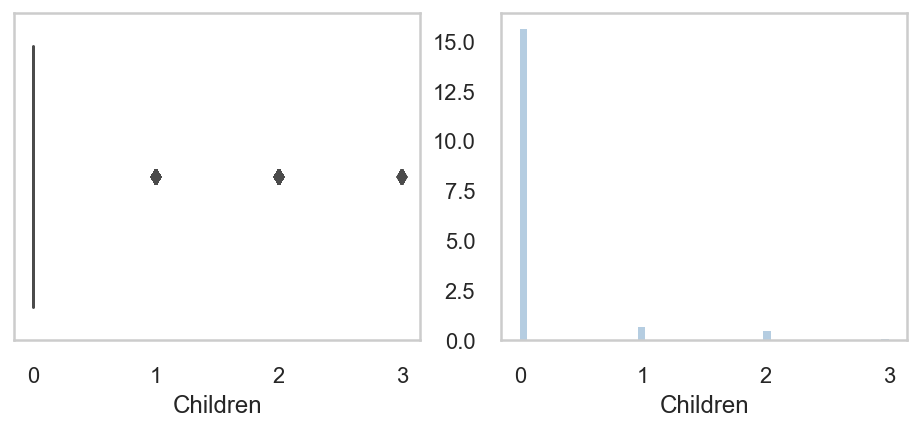

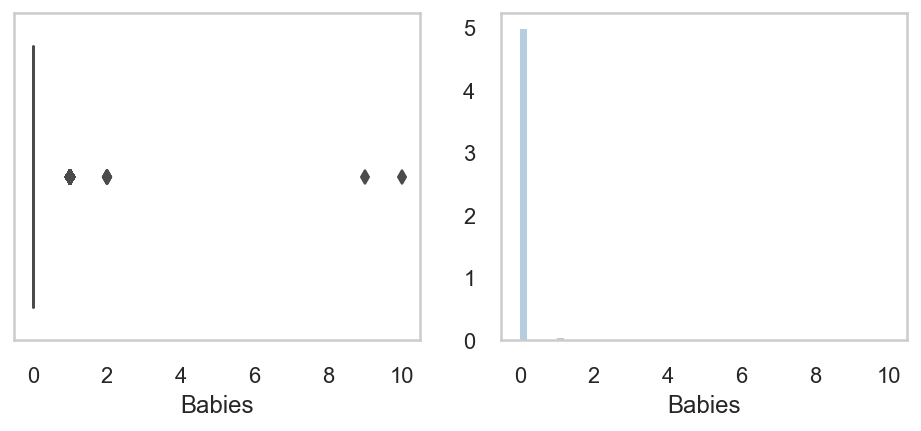

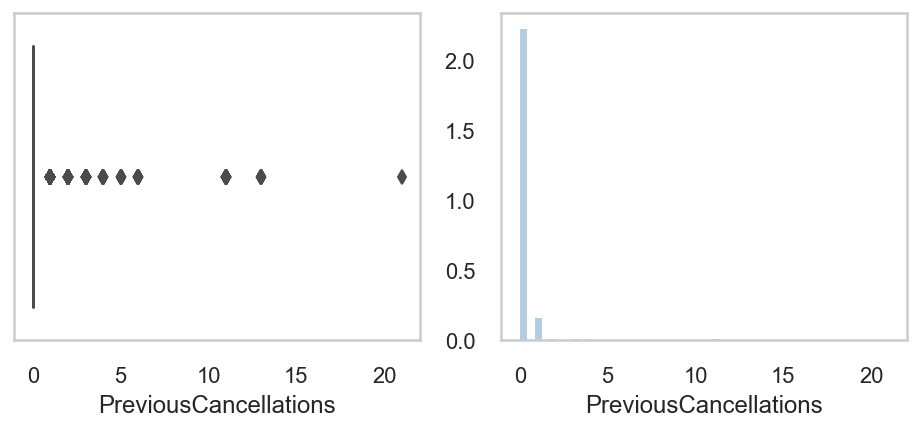

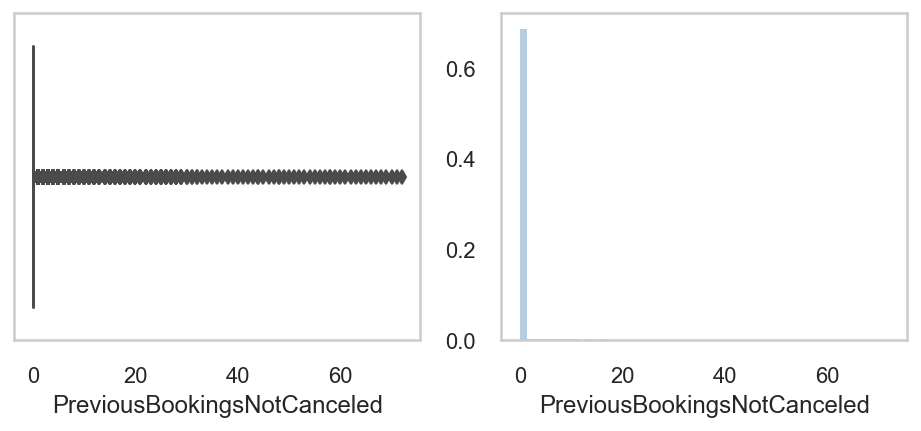

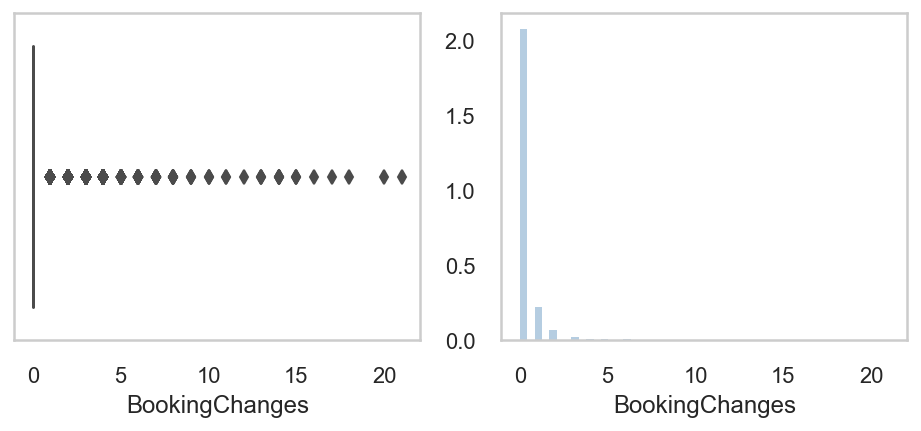

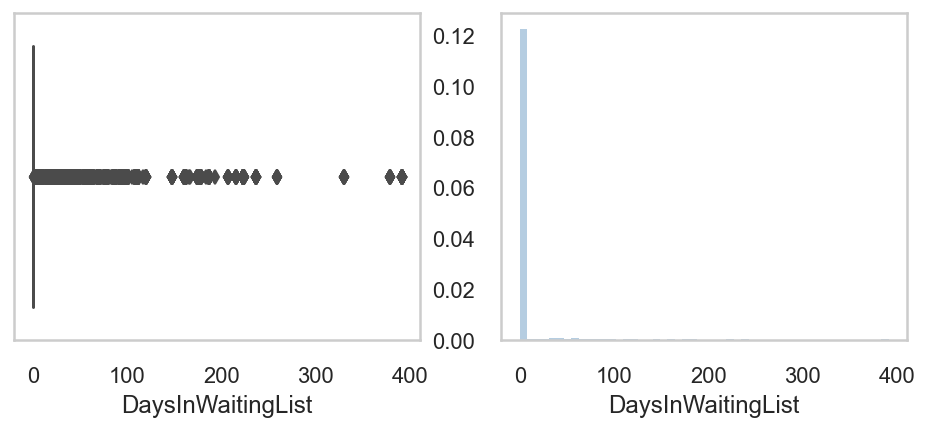

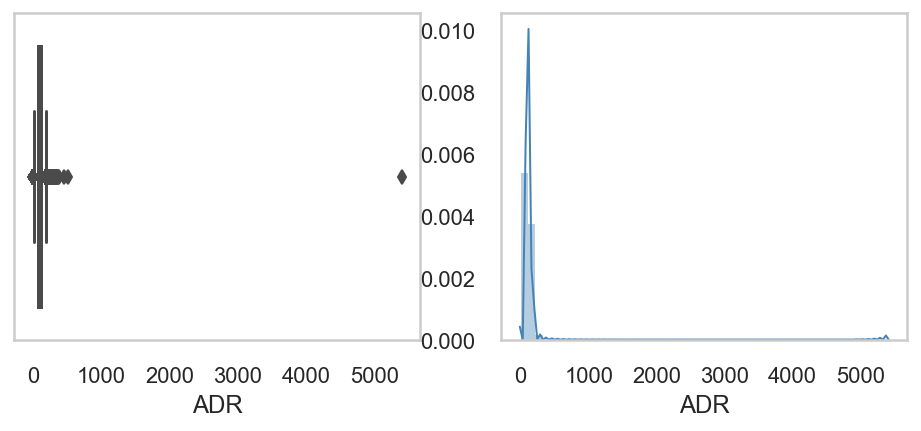

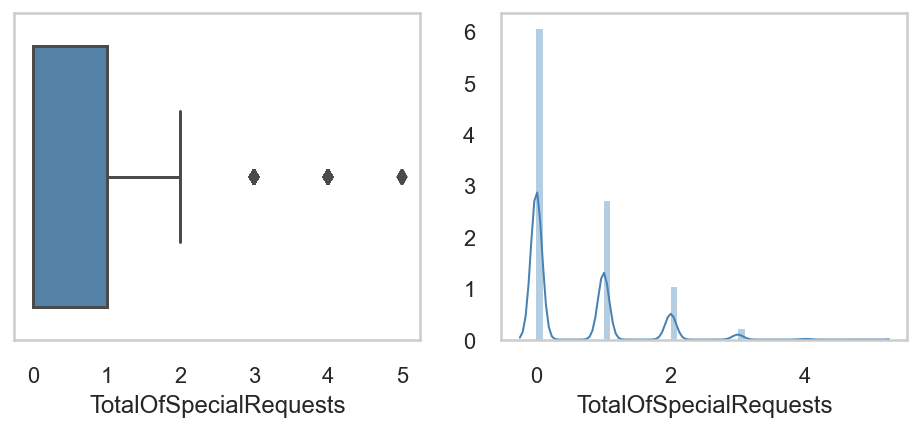

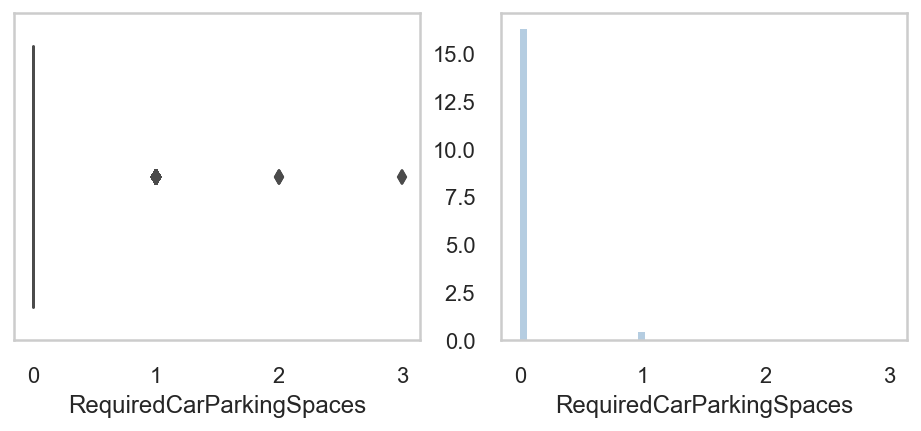

In [27]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()
    
#This helps identify any possible outliers, visualy, applied only to the numeric variables
fig_num = 1        
for col in metric_features:
    hist_box_plot(df,col, fig_num)
    fig_num = fig_num + 1

In [28]:
df_original=df.copy()
filters1 = (
    (df['StaysInWeekendNights']<=15)
    &
    (df['StaysInWeekNights']<=30)
    &
    (df['Babies']<=8)
    &
    (df['ADR']<=1000)
)

In [29]:
data_1 = df[filters1]
print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / initial_num_rows, 4)*100, '%')

Percentage of data kept after removing outliers: 99.83999999999999 %


In [30]:
df= data_1.copy()

<hr>
<a class="anchor" id="5.">
    
# 5. Feature Selection
    
</a>

<hr>
<a class="anchor" id="5.1.">
    
# 5.1. Principal Component Analysis
    
</a>


In [33]:
#PCA to verify which variables are correlated with the principal components that explain most of the variance

#PCA to verify which variables are correlated with the principal components that explain most of the variance
df_pca = df[metric_features].copy()

pca = PCA()
pca_feat = pca.fit_transform(df_pca)
pca_feat

array([[-9.70844025e+01, -1.11410967e+02, -3.28376128e+00, ...,
         9.26488796e-02, -1.21249300e-02, -2.16736389e-03],
       [-1.99988673e+01, -2.99958643e+01, -3.58451692e+00, ...,
        -1.38841622e-01, -3.11595933e-02, -9.15915818e-03],
       [-4.24159248e+01, -3.99089267e+01, -3.07128419e+00, ...,
        -2.93608116e-01, -2.71246051e-02, -7.35717449e-03],
       ...,
       [-7.86828131e+01,  4.79935840e+01,  1.25375276e+00, ...,
        -3.16645478e-01, -5.81690696e-02, -2.62251464e-02],
       [-6.08206202e-01, -5.23006303e-01, -3.09223225e+00, ...,
         9.42322734e-02,  1.33128249e-02,  2.46589692e-03],
       [ 9.22591282e+01,  5.21281825e+01, -4.88450892e+00, ...,
        -2.70052602e-01, -9.55344134e-03, -9.64700655e-03]])

In [ ]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(df_pca.values @ pca.components_.T, 
             index=df_pca.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [ ]:
# Output PCA table
pca_table =pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
pca_table

In [ ]:
#figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

print('The minimum number of PCA to obtain at least 0.8 variance explained is: ',len(pca_table[pca_table["Cumulative"]<0.8]))
plt.show()

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=6)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

In [ ]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

In [ ]:
def _color_red_or_green(val):
    if val < -0.4:
        color = 'background-color: red'
    elif val > 0.4:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[df_pca.columns].corr().loc[df_pca.columns, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

<hr>
<a class="anchor" id="5.2.">
    
# 5.2. Chi-squared
    
</a>


In [ ]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df[non_metric_features].columns :
  data_encoded[i]=label.fit_transform(df[non_metric_features][i].astype('str'))

data_encoded.head()

In [ ]:
# feature selection
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(data_encoded[non_metric_features].drop(columns=['IsCanceled', 'ReservationStatusDate', 'ReservationStatus']), data_encoded['IsCanceled'])
# print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (data_encoded[non_metric_features].drop(columns=['IsCanceled', 'ReservationStatusDate', 'ReservationStatus']).columns[i], sf_fit1.scores_[i]))

In [ ]:
# plot the scores of features
datset1 = pd.DataFrame()
datset1['feature'] = data_encoded[non_metric_features].drop(columns=['IsCanceled', 'ReservationStatusDate', 'ReservationStatus']).columns[ range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)
sns.barplot(datset1['scores'], datset1['feature'], color='darkblue')
sns.set_style('whitegrid')
plt.ylabel('Categorical feature', fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.title('Chi-squared results with label encoding', fontsize=18)
plt.show()

<hr>
<a class="anchor" id="5.3.">
    
# 5.3. Multiple Correspondance Analysis
    
</a>


In [ ]:
variables_mca = non_metric_features
data_mca = df.copy()
data_mca = pd.concat([data_mca], axis=1)
data_mca['IsCanceled'] = data_mca['IsCanceled'].apply(lambda x: 'yes' if x==1 else 'no')

In [ ]:
data_mca[non_metric_features]

In [ ]:
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
this_mca = mca.fit(data_mca[variables_mca].drop(columns=['ReservationStatusDate', 'Agent', 'Company',
                                                        'ReservedRoomType', 'Country', 'ArrivalDateMonth',
                                                        'AssignedRoomType']))

ax = this_mca.plot_coordinates(
        X=data_mca[variables_mca].drop(columns=['ReservationStatusDate', 'Agent', 'Company',
                                               'ReservedRoomType', 'Country', 'ArrivalDateMonth',
                                               'AssignedRoomType']),
        figsize=(20, 20),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=100,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Pearson Correlation Matrix

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

mask = np.zeros_like(df[['IsCanceled'] + metric_features].corr(method="pearson"), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df[['IsCanceled'] + metric_features].corr(method="pearson"),vmin=-1, vmax=1, square=True, annot=True, mask=mask)

plt.title('Correlation Matrix for Numerical Variables', fontsize=18)
plt.show()

## Phik Correlation Matrix

In [ ]:
import phik
phik_matrix = df.phik_matrix()
fig, axes = plt.subplots(1, 1, figsize=(30, 15))

mask = np.zeros_like(phik_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(phik_matrix,vmin=0, vmax=1, square=True, annot=True, mask=mask)

plt.title('Phik Correlation Matrix', fontsize=18)
plt.show()

In [ ]:
feature_selection = ['MarketSegment', 'CustomerType',
                    'LeadTime', 'ArrivalDateWeekNumber', 'NumberOfNights', 
                    'PreviousCancellations', 'PreviousBookingsNotCanceled', 
                    'BookingChanges', 'TotalOfSpecialRequests', 'Babies', 'Country', 'Agent']

selected_metric_features = ['LeadTime', 'ArrivalDateWeekNumber', 'NumberOfNights', 
                            'PreviousCancellations', 'PreviousBookingsNotCanceled', 
                            'BookingChanges', 'TotalOfSpecialRequests', 'Babies']

selected_non_metric_features = ['MarketSegment', 'CustomerType', 'Country', 'Agent']

In [ ]:
df[non_metric_features].dtypes

# Data Construction

In [127]:
df['NumberOfNights'] = df['StaysInWeekendNights'] + df['StaysInWeekNights']

In [128]:
#Create variable for cancelation date and use to understand when cancelations are done

<hr>
<a class="anchor" id=".">
    
# Creating variables to analyze relationship between booking date, cancelation date and arrival date
    
</a>


In [251]:
#Create variable for cancelation date and use to understand when cancelations are done
df_cancelations = df[df['IsCanceled']==1]
df_cancelations = df_cancelations[['ReservationStatusDate', 'LeadTime', 
                    'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']]
df_cancelations

ReservationStatusDate  LeadTime  ArrivalDateYear ArrivalDateMonth  \
1                2015-07-01        88             2015             July   
2                2015-04-30        65             2015             July   
3                2015-06-23        92             2015             July   
4                2015-04-02       100             2015             July   
5                2015-06-25        79             2015             July   
...                     ...       ...              ...              ...   
70220            2017-04-25       132             2017            April   
71295            2017-06-05         4             2017             June   
71864            2017-05-31         7             2017              May   
71865            2017-07-17         6             2017             July   
77235            2017-08-02         0             2017           August   

       ArrivalDateDayOfMonth  
1                          1  
2                          1  
3                          1  
4                          2  
5                          2  
...                      ...  
70220                     25  
71295                      5  
71864                     31  
71865                     17  
77235                      2  

[33029 rows x 5 columns]

In [252]:
def month_to_number(x):
    month_dic = {'January': 1,
                 'February': 2,
                'March': 3,
                'April': 4,
                'May': 5,
                'June': 6,
                'July': 7,
                'August': 8,
                'September': 9,
                'October': 10,
                'November': 11,
                'December': 12}
    return month_dic[x]


In [253]:
df_cancelations['CancelationDate'] = pd.to_datetime(df_cancelations['ReservationStatusDate'])
df_cancelations['ArrivalDateYear'] = df_cancelations['ArrivalDateYear'].astype('str')
df_cancelations['ArrivalDateMonth'] = df_cancelations['ArrivalDateMonth'].apply(month_to_number)
df_cancelations['ArrivalDateMonth'] = df_cancelations['ArrivalDateMonth'].astype('str')
df_cancelations['ArrivalDateDayOfMonth'] = df_cancelations['ArrivalDateDayOfMonth'].astype('str')

In [254]:
def add_0(x):
    if len(x)==1:
        return '0'+x
    return x

df_cancelations['ArrivalDateMonth'] = df_cancelations['ArrivalDateMonth'].apply(add_0)
df_cancelations['ArrivalDateDayOfMonth'] = df_cancelations['ArrivalDateDayOfMonth'].apply(add_0)
df_cancelations['ArrivalDate'] = df_cancelations['ArrivalDateYear']+'-'+df_cancelations['ArrivalDateMonth']+'-'+df_cancelations['ArrivalDateDayOfMonth']
df_cancelations['ArrivalDate'] = pd.to_datetime(df_cancelations['ArrivalDate'])
df_cancelations['CancelationTime'] = df_cancelations['ArrivalDate']-df_cancelations['CancelationDate']
df_cancelations.head()

ReservationStatusDate  LeadTime ArrivalDateYear ArrivalDateMonth  \
1            2015-07-01        88            2015               07   
2            2015-04-30        65            2015               07   
3            2015-06-23        92            2015               07   
4            2015-04-02       100            2015               07   
5            2015-06-25        79            2015               07   

  ArrivalDateDayOfMonth CancelationDate ArrivalDate CancelationTime  
1                    01      2015-07-01  2015-07-01          0 days  
2                    01      2015-04-30  2015-07-01         62 days  
3                    01      2015-06-23  2015-07-01          8 days  
4                    02      2015-04-02  2015-07-02         91 days  
5                    02      2015-06-25  2015-07-02          7 days

In [255]:
from datetime import datetime, timedelta

def to_timedelta(x):
    return timedelta(x)

df_cancelations['LeadTimeDelta'] = df_cancelations['LeadTime'].apply(timedelta)

In [256]:
df_cancelations['BookingDate'] = df_cancelations['ArrivalDate'] - df_cancelations['LeadTimeDelta']
df_cancelations

ReservationStatusDate  LeadTime ArrivalDateYear ArrivalDateMonth  \
1                2015-07-01        88            2015               07   
2                2015-04-30        65            2015               07   
3                2015-06-23        92            2015               07   
4                2015-04-02       100            2015               07   
5                2015-06-25        79            2015               07   
...                     ...       ...             ...              ...   
70220            2017-04-25       132            2017               04   
71295            2017-06-05         4            2017               06   
71864            2017-05-31         7            2017               05   
71865            2017-07-17         6            2017               07   
77235            2017-08-02         0            2017               08   

      ArrivalDateDayOfMonth CancelationDate ArrivalDate CancelationTime  \
1                        01      2015-07-01  2015-07-01          0 days   
2                        01      2015-04-30  2015-07-01         62 days   
3                        01      2015-06-23  2015-07-01          8 days   
4                        02      2015-04-02  2015-07-02         91 days   
5                        02      2015-06-25  2015-07-02          7 days   
...                     ...             ...         ...             ...   
70220                    25      2017-04-25  2017-04-25          0 days   
71295                    05      2017-06-05  2017-06-05          0 days   
71864                    31      2017-05-31  2017-05-31          0 days   
71865                    17      2017-07-17  2017-07-17          0 days   
77235                    02      2017-08-02  2017-08-02          0 days   

      LeadTimeDelta BookingDate  
1           88 days  2015-04-04  
2           65 days  2015-04-27  
3           92 days  2015-03-31  
4          100 days  2015-03-24  
5           79 days  2015-04-14  
...             ...         ...  
70220      132 days  2016-12-14  
71295        4 days  2017-06-01  
71864        7 days  2017-05-24  
71865        6 days  2017-07-11  
77235        0 days  2017-08-02  

[33029 rows x 10 columns]

In [257]:
df_cancelations['BookingToCancelationTime'] = df_cancelations['CancelationDate'] - df_cancelations['BookingDate']
df_cancelations.head()

ReservationStatusDate  LeadTime ArrivalDateYear ArrivalDateMonth  \
1            2015-07-01        88            2015               07   
2            2015-04-30        65            2015               07   
3            2015-06-23        92            2015               07   
4            2015-04-02       100            2015               07   
5            2015-06-25        79            2015               07   

  ArrivalDateDayOfMonth CancelationDate ArrivalDate CancelationTime  \
1                    01      2015-07-01  2015-07-01          0 days   
2                    01      2015-04-30  2015-07-01         62 days   
3                    01      2015-06-23  2015-07-01          8 days   
4                    02      2015-04-02  2015-07-02         91 days   
5                    02      2015-06-25  2015-07-02          7 days   

  LeadTimeDelta BookingDate BookingToCancelationTime  
1       88 days  2015-04-04                  88 days  
2       65 days  2015-04-27                   3 days  
3       92 days  2015-03-31                  84 days  
4      100 days  2015-03-24                   9 days  
5       79 days  2015-04-14                  72 days

In [258]:
df_cancelations['LeadTime'] = df_cancelations['ArrivalDate'] - df_cancelations['BookingDate']
df_cancelations.head()

ReservationStatusDate LeadTime ArrivalDateYear ArrivalDateMonth  \
1            2015-07-01  88 days            2015               07   
2            2015-04-30  65 days            2015               07   
3            2015-06-23  92 days            2015               07   
4            2015-04-02 100 days            2015               07   
5            2015-06-25  79 days            2015               07   

  ArrivalDateDayOfMonth CancelationDate ArrivalDate CancelationTime  \
1                    01      2015-07-01  2015-07-01          0 days   
2                    01      2015-04-30  2015-07-01         62 days   
3                    01      2015-06-23  2015-07-01          8 days   
4                    02      2015-04-02  2015-07-02         91 days   
5                    02      2015-06-25  2015-07-02          7 days   

  LeadTimeDelta BookingDate BookingToCancelationTime  
1       88 days  2015-04-04                  88 days  
2       65 days  2015-04-27                   3 days  
3       92 days  2015-03-31                  84 days  
4      100 days  2015-03-24                   9 days  
5       79 days  2015-04-14                  72 days

In [259]:
df_cancelations = df_cancelations[['LeadTime', 'BookingToCancelationTime', 'CancelationTime']]
df_cancelations.head()

LeadTime BookingToCancelationTime CancelationTime
1  88 days                  88 days          0 days
2  65 days                   3 days         62 days
3  92 days                  84 days          8 days
4 100 days                   9 days         91 days
5  79 days                  72 days          7 days

In [260]:
df_cancelations['LeadTime'] = df_cancelations['LeadTime'].dt.days
df_cancelations['BookingToCancelationTime'] = df_cancelations['BookingToCancelationTime'].dt.days
df_cancelations['CancelationTime'] = df_cancelations['CancelationTime'].dt.days

In [261]:
df_cancelations.sort_values(by='LeadTime', ascending=False)

LeadTime  BookingToCancelationTime  CancelationTime
25179       629                       103              526
25191       629                       103              526
25177       629                       103              526
25178       629                       103              526
25180       629                       103              526
...         ...                       ...              ...
14586         0                         0                0
14612         0                         0                0
14729         0                         0                0
21419         0                         0                0
77235         0                         0                0

[33029 rows x 3 columns]

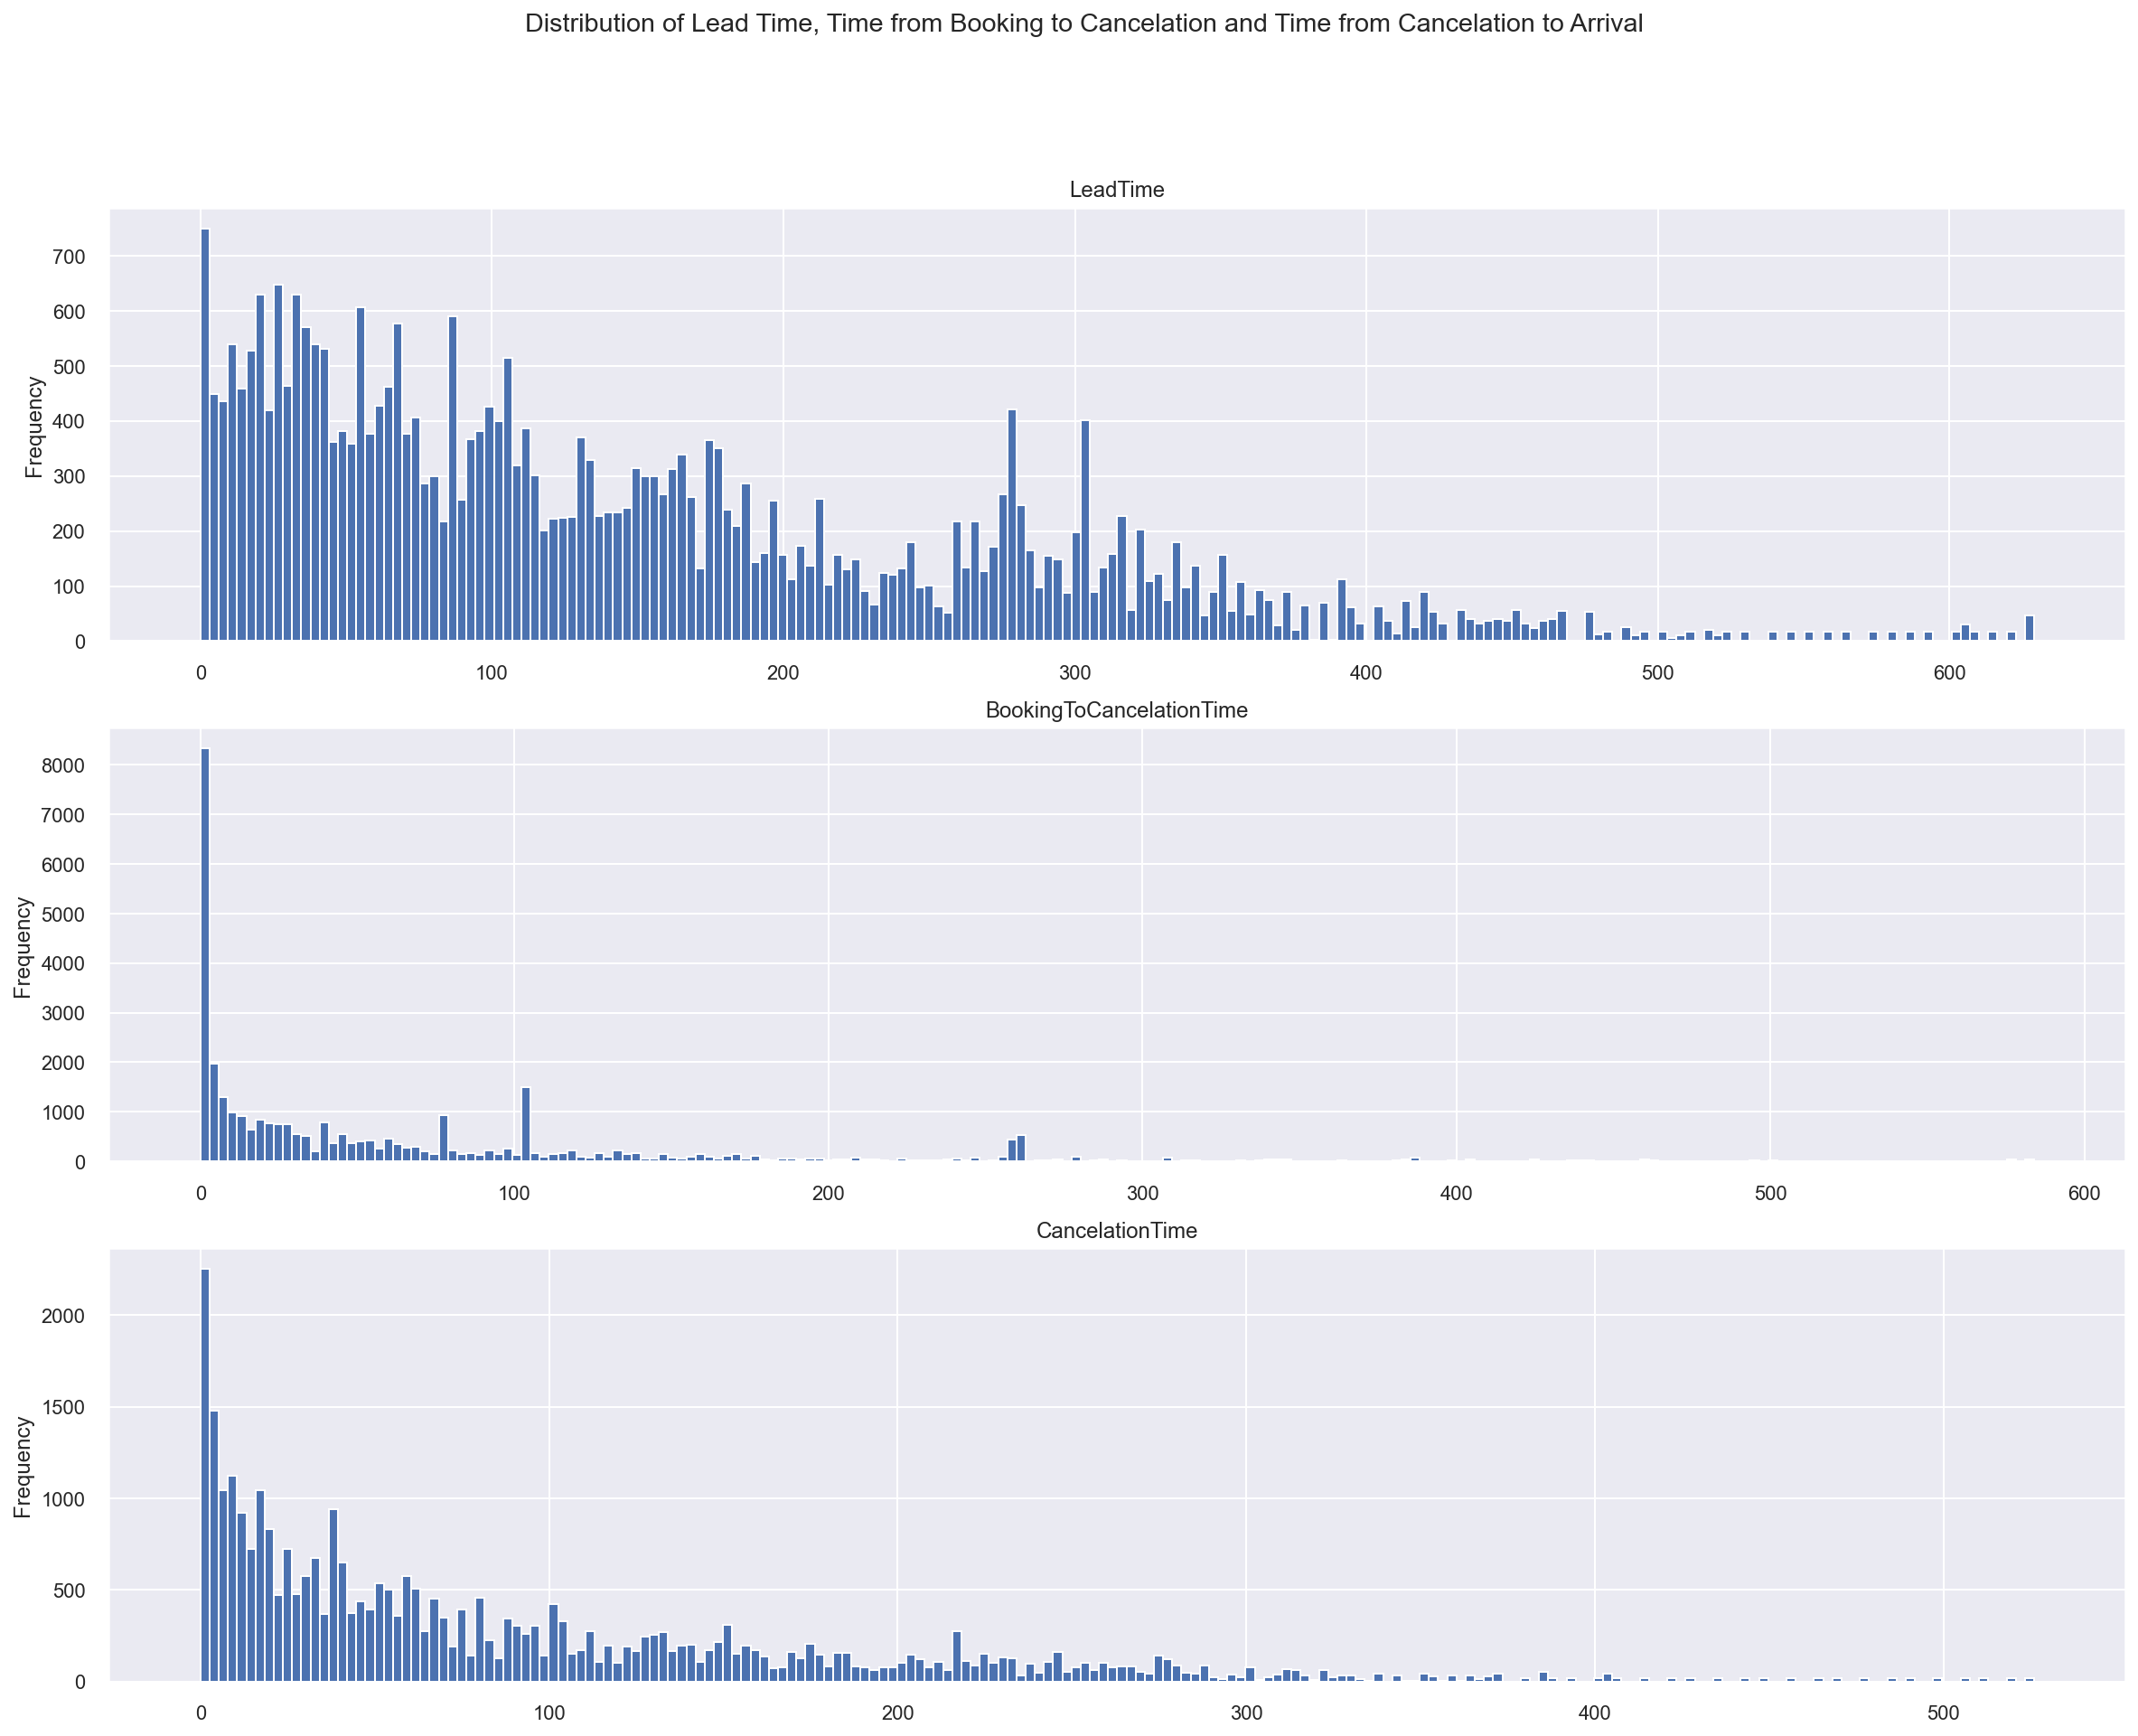

In [262]:
#Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

# Plot data
for ax, feat in zip(axes.flatten(), df_cancelations.columns): 
    df_cancelations[feat].plot(kind="hist", ax=ax, title=feat, bins=200)

title = "Distribution of Lead Time, Time from Booking to Cancelation and Time from Cancelation to Arrival"
plt.suptitle(title)

plt.show()

## Notes on booking-cancelation-arrival timeline
- Most cancelations are done in the first 10 days after

<hr>
<a class="anchor" id="6.">
    
# 6. Final Checks
    
</a>


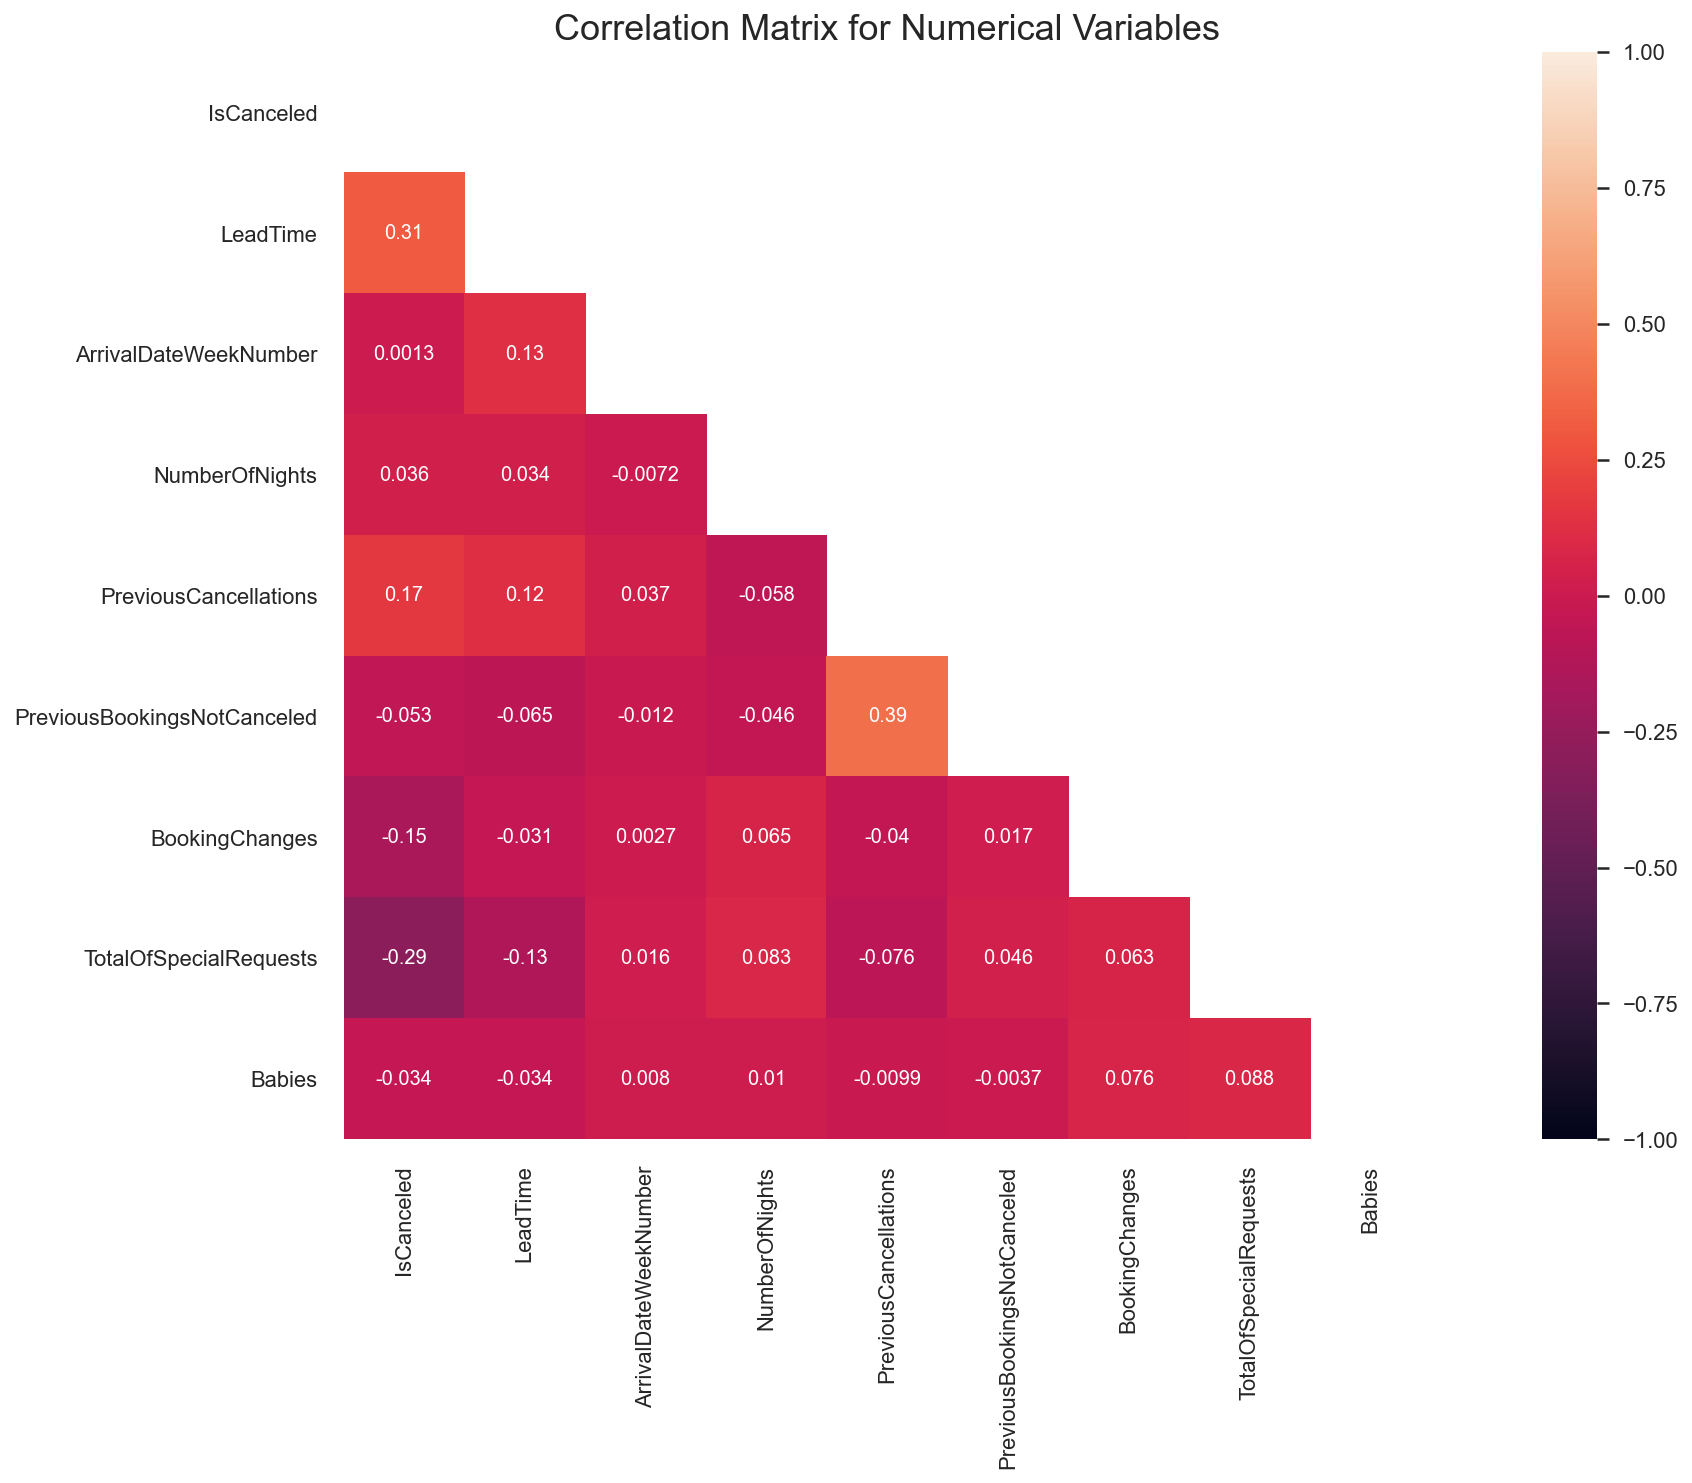

In [129]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

mask = np.zeros_like(df[['IsCanceled'] + selected_metric_features].corr(method="pearson"), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df[['IsCanceled'] + selected_metric_features].corr(method="pearson"),vmin=-1, vmax=1, square=True, annot=True, mask=mask)

plt.title('Correlation Matrix for Numerical Variables', fontsize=18)
plt.show()


interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateWeekNumber', 'NumberOfNights', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'TotalOfSpecialRequests', 'Babies']


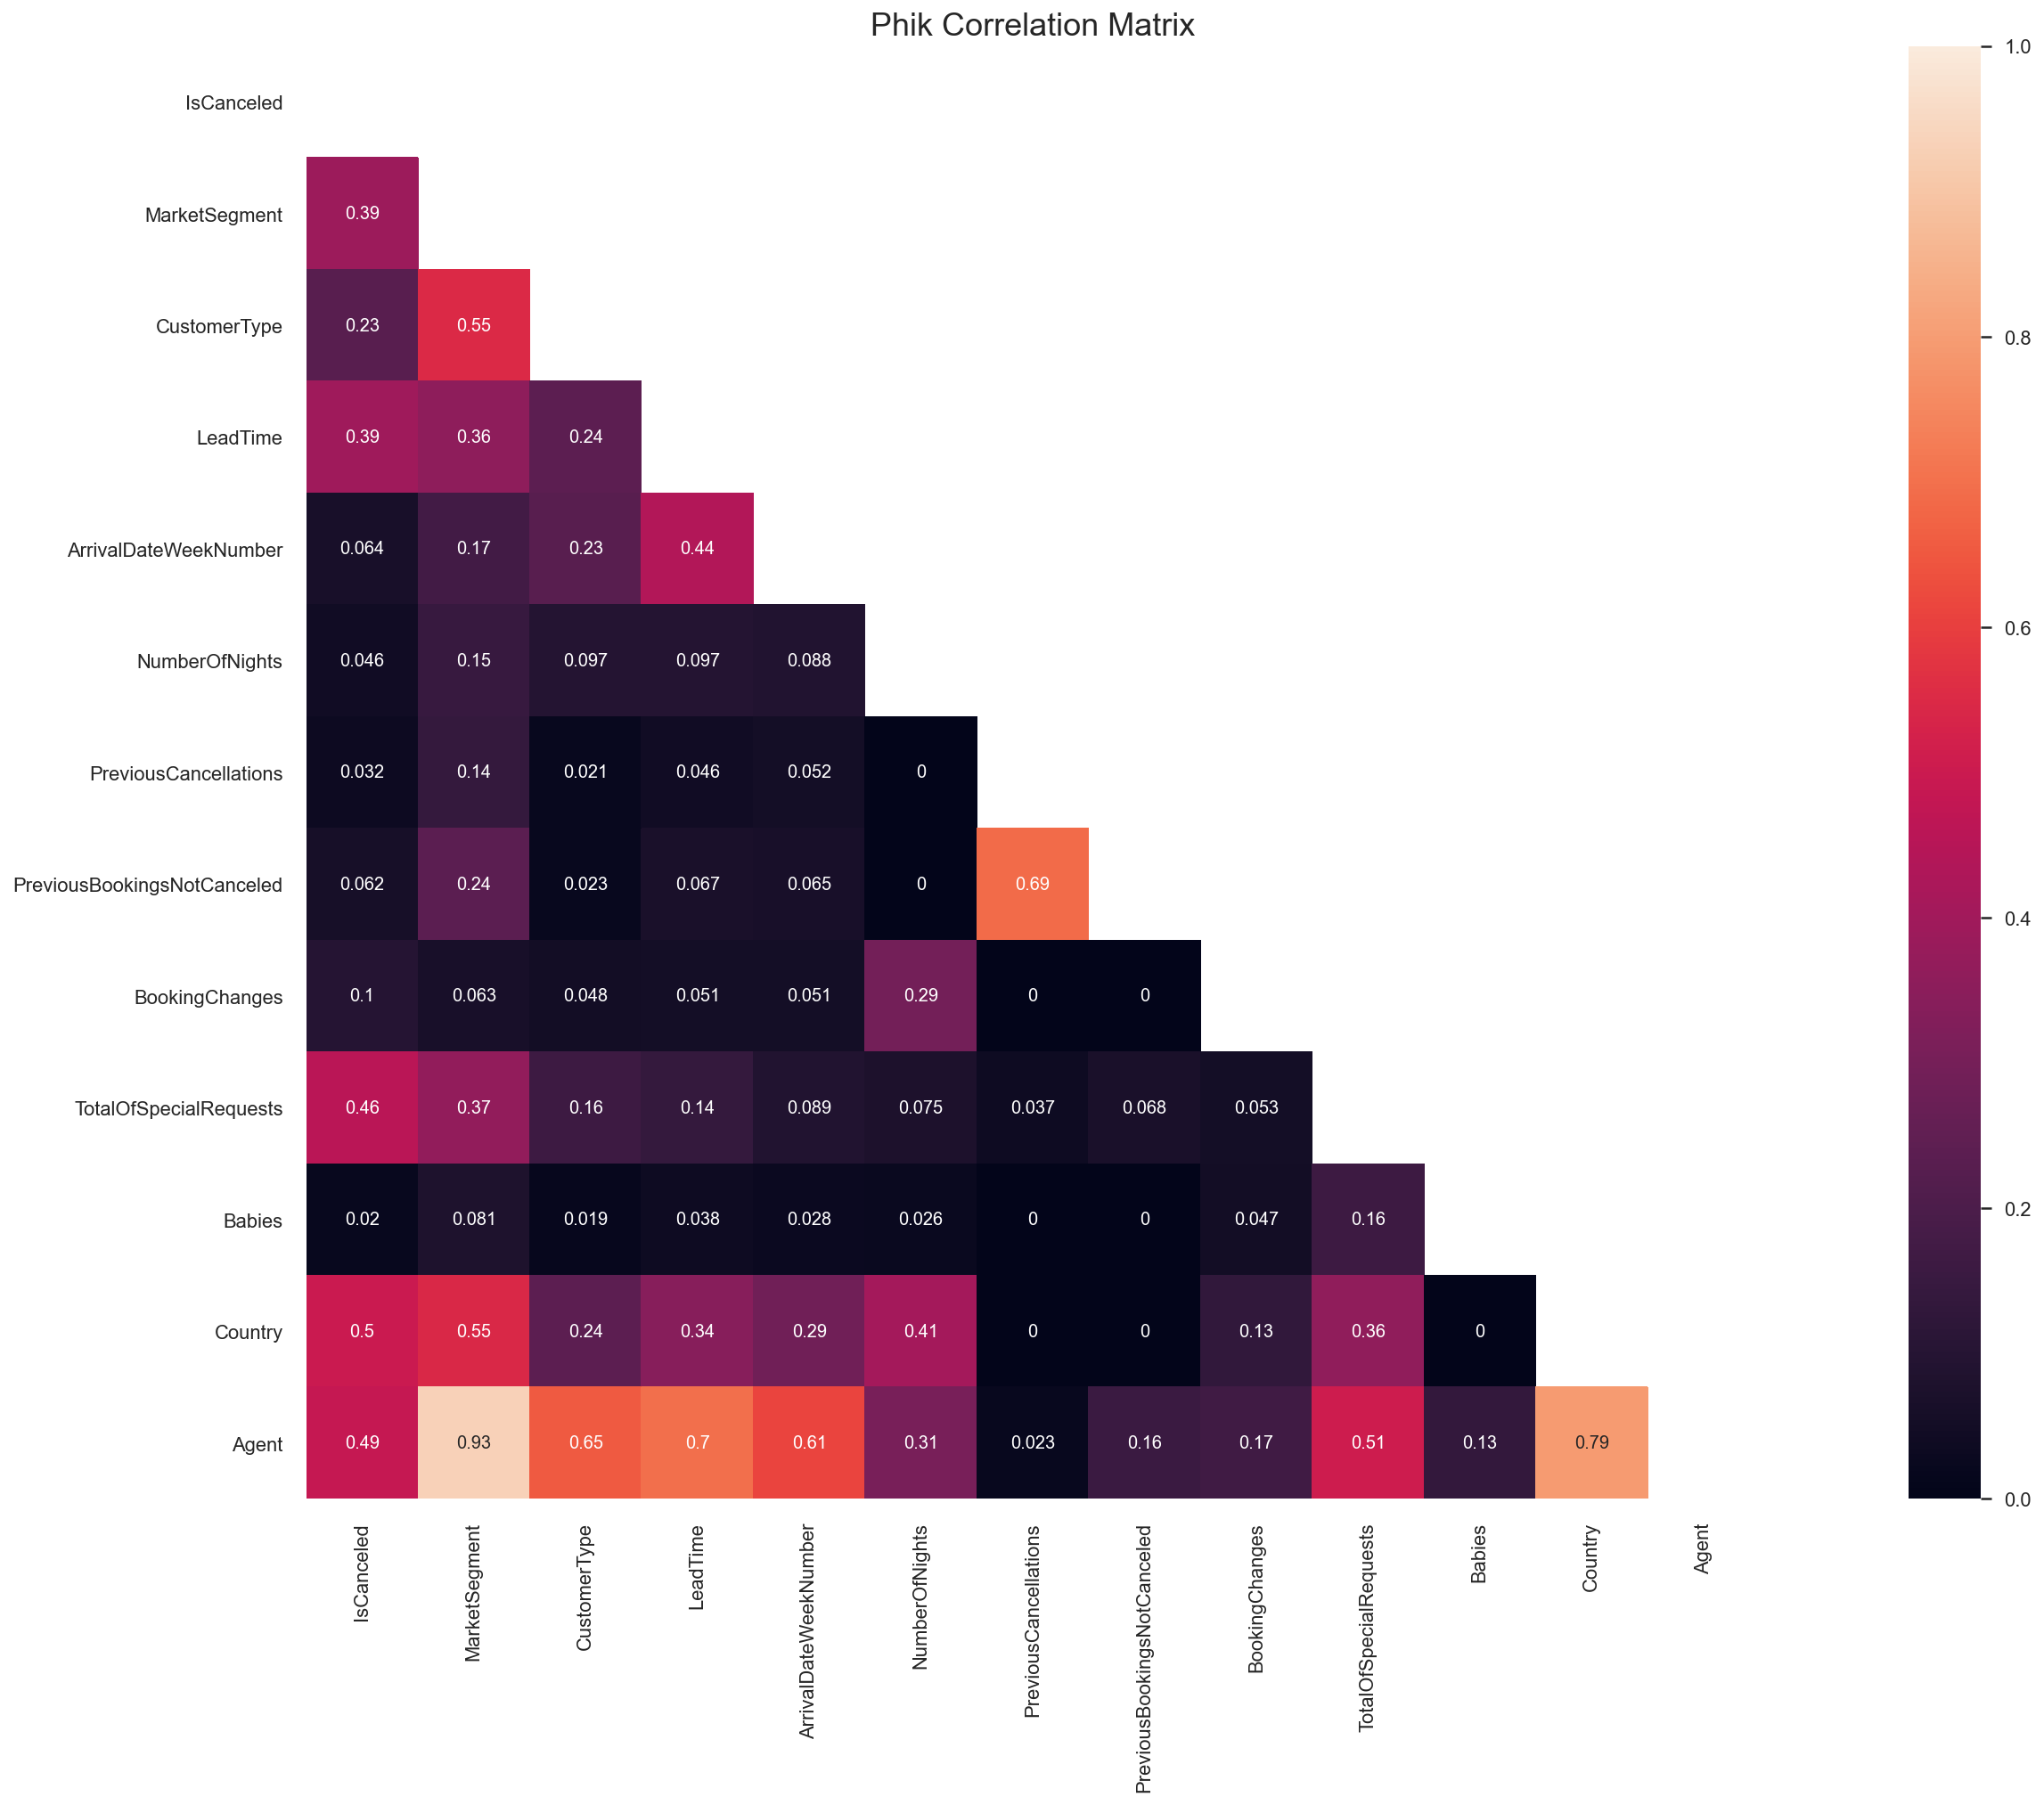

In [160]:
import phik
phik_matrix = df[['IsCanceled'] + feature_selection].phik_matrix()
fig, axes = plt.subplots(1, 1, figsize=(30, 15))

mask = np.zeros_like(phik_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(phik_matrix,vmin=0, vmax=1, square=True, annot=True, mask=mask)

plt.title('Phik Correlation Matrix', fontsize=18)
plt.show()

### Removing duplicates not to bias results

In [131]:
df_no_duplicates = df.drop_duplicates(subset=None, keep='first', inplace=False)

<hr>
<a class="anchor" id="7.">
    
# 7. Modelling
    
</a>

## Creating a Pipeline for testing
- With this pipeline we can define which variables to include, what encoding should be applied to the data and the scaling method. 
- The pipeline will apply a stratified train/test split using 80% of the data for testing.
- The classification report as well as the confusion matrix for both the train and validation can be printed.
- It will return the Recall of the chosen model based on the performance on the validation set.

#### Parameters:
- model: model to be used
- df: data frame with the data to use
- variables: which columns to include 
- target: target variable to predict
- encoding: can be 'one-hot' or 'label' encoding
- scaling: 'minmax' or 'standard'
- print_report: 'yes'or 'no'

In [132]:
#Function to test_model without cross-validation (for quick testing)
def test_model(model, df=df, variables=feature_selection, encoding='one-hot', scaling=0, random_state = 5, 
               target='IsCanceled', print_report='yes'):
    
    #Defining features to be used based on parameter variables
    X = df[variables]
    
    #Defining target
    y = df[target]
    
    
    #Encoding
    #One-hot encoding
    if encoding=='one-hot':
        X = pd.get_dummies(X)    
    #Label-encoding
    if encoding=='label':
        label = preprocessing.LabelEncoder()
        data_label_encoded = pd.DataFrame() 
        for i in df[selected_non_metric_features].columns:
            data_label_encoded[i]=label.fit_transform(df[selected_non_metric_features][i])
        X = pd.concat([data_label_encoded, data[metric_features]], axis=1)
        X = X[variables]
    
    #Defines model to be used
    model = model

    #Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=random_state)
        
    #Scaling 
    #MinMaxScaler
    if scaling=='minmax':
        included_metric_features = selected_metric_features
        #define the scaler
        scaler = MinMaxScaler()
        #scaling metric features both in the train and test data sets
        scaled_metric_feat_train = pd.DataFrame(scaler.fit_transform(X_train[included_metric_features]), 
                                                columns=included_metric_features, index=X_train.index)
        scaled_metric_feat_test = pd.DataFrame(scaler.fit_transform(X_test[included_metric_features]),
                                                      columns=included_metric_features, index=X_test.index)
        #Changing metric features in train and test to scaled
        for column in included_metric_features:
            X_train[column] = scaled_metric_feat_train[column]
            X_test[column] = scaled_metric_feat_test[column]
       
    #StandardScaler
    if scaling=='standard':
        included_metric_features = selected_metric_features
        #define the scaler
        scaler = StandardScaler()
        #scaling metric features both in the train and test data sets
        scaled_metric_feat_train = pd.DataFrame(scaler.fit_transform(X_train[included_metric_features]), 
                                                columns=included_metric_features, index=X_train.index)
        scaled_metric_feat_test = pd.DataFrame(scaler.fit_transform(X_test[included_metric_features]),
                                                      columns=included_metric_features, index=X_test.index)
        #Changing metric features in train and test to scaled
        for column in included_metric_features:
            X_train[column] = scaled_metric_feat_train[column]
            X_test[column] = scaled_metric_feat_test[column]
    
    #Fit model
    model.fit(X_train, y_train)

    #Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    expected_y_train = y_train
    expected_y_test = y_test
    
    #print classification report  
    if print_report=='yes':
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(expected_y_train, y_pred_train))
        print(confusion_matrix(expected_y_train, y_pred_train))


        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(expected_y_test, y_pred_test))
        print(confusion_matrix(expected_y_test, y_pred_test))
    
    #return f1_score micro average
    return recall_score(y_test, y_pred_test, average='binary')

In [150]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [133]:
#Function to test_model with cross-validation (for validating results)


## Testing range of model candidates 


In [134]:
#Decision Tree
DT = DecisionTreeClassifier(max_depth=5)

#Naive Bayes
#NB = CategoricalNB()

#SupportVectorMachine
SVM = svm.SVC()

#Neural Network
NN = MLPClassifier()

#Logistic Regression
LR = LogisticRegression()

#KNN
KNN = KNeighborsClassifier()

<hr>
<a class="anchor" id="7.1.">
    
# 7.1 Decision Tree
    
</a>

In [185]:
DT_benchmark = test_model(DT, df=df_no_duplicates, print_report='yes')

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     29877
           1       0.69      0.58      0.63     12818

    accuracy                           0.80     42695
   macro avg       0.76      0.73      0.74     42695
weighted avg       0.79      0.80      0.79     42695

[[26547  3330]
 [ 5384  7434]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<hr>
<a class="anchor" id="7.2.">
    
# 7.2 KNN
    
</a>

In [186]:
KNN_benchmark = test_model(KNN, df=df_no_duplicates, print_report='yes')

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     29877
           1       0.72      0.64      0.68     12818

    accuracy                           0.82     42695
   macro avg       0.79      0.77      0.77     42695
weighted avg       0.81      0.82      0.81     42695

[[26659  3218]
 [ 4603  8215]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<hr>
<a class="anchor" id="7.3.">
    
# 7.3 Logistic Regression     
</a>

In [187]:
LR_benchmark = test_model(LR, df=df_no_duplicates, print_report='yes')

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     29877
           1       0.65      0.45      0.53     12818

    accuracy                           0.76     42695
   macro avg       0.72      0.67      0.69     42695
weighted avg       0.75      0.76      0.75     42695

[[26822  3055]
 [ 7054  5764]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<hr>
<a class="anchor" id="7.4.">
    
# 7.4 Neural Network     
</a>

In [139]:
NN_benchmark = test_model(NN, df=df_no_duplicates, print_report='yes')

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     29877
           1       0.77      0.67      0.72     12818

    accuracy                           0.84     42695
   macro avg       0.82      0.79      0.80     42695
weighted avg       0.84      0.84      0.84     42695

[[27392  2485]
 [ 4284  8534]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [202]:
NN = MLPClassifier(random_state = 5).fit(X_train, y_train)


y_nn_train= NN.predict(X_train)
y_nn_val = NN.predict(X_test)

recall_score(y_test, y_nn_val, average='binary')

0.6004993757802747

<hr>
<a class="anchor" id="7.5.">
    
# 7.5 HGB
</a>

In [141]:
HGB = HistGradientBoostingClassifier(scoring='recall', 
                                        max_depth=12, 
                                        min_samples_leaf=24,
                                        max_leaf_nodes=16,
                                        loss='binary_crossentropy',
                                        learning_rate = 0.1,
                                        random_state = 5
                                    )

HGB_recall = test_model(HGB, df=df, scaling='standard', print_report='yes')
HGB_recall

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.87     36940
           1       0.85      0.77      0.81     26423

    accuracy                           0.85     63363
   macro avg       0.85      0.84      0.84     63363
weighted avg       0.85      0.85      0.85     63363

[[33494  3446]
 [ 6136 20287]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

0.7650620647895853

In [142]:
from sklearn.pipeline import Pipeline

X = pd.get_dummies(df_no_duplicates[feature_selection])
y = df_no_duplicates['IsCanceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1)   
pipe = Pipeline([('scaler', StandardScaler()), ('HGB', HGB)])
# The pipeline can be used as any other estimator and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
pipe.predict(X_test)

recall_score(y_test, pipe.predict(X_test), average='binary')

0.5901997503121099

In [143]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
expected_y_train = y_train
expected_y_test = y_test

print('___________________________________________________________________________________________________________')
print('                                                     TRAIN                                                 ')
print('-----------------------------------------------------------------------------------------------------------')
print(classification_report(expected_y_train, y_pred_train))
print(confusion_matrix(expected_y_train, y_pred_train))

print('___________________________________________________________________________________________________________')
print('                                                VALIDATION                                                 ')
print('-----------------------------------------------------------------------------------------------------------')
print(classification_report(expected_y_test, y_pred_test))
print(confusion_matrix(expected_y_test, y_pred_test))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     29877
           1       0.73      0.61      0.67     12818

    accuracy                           0.82     42695
   macro avg       0.79      0.76      0.77     42695
weighted avg       0.81      0.82      0.81     42695

[[26992  2885]
 [ 4971  7847]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<hr>
<a class="anchor" id="7.6.">
    
# 7.6 Random Forest
</a>

In [148]:
w= 2
regressor = RandomForestClassifier(n_estimators=125, random_state=0,bootstrap='true',
                                   class_weight={0:1},max_features='sqrt', max_depth= 35,
                                  min_samples_leaf=1, min_samples_split= 15 )

regressor.fit(X_train, y_train)
y_forest_train= regressor.predict(X_train)
y_forest_val = regressor.predict(X_test)

In [152]:
metrics(y_train, y_forest_train, y_test, y_forest_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     29877
           1       0.81      0.65      0.72     12818

    accuracy                           0.85     42695
   macro avg       0.83      0.79      0.81     42695
weighted avg       0.85      0.85      0.84     42695

[[27883  1994]
 [ 4477  8341]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [154]:
recall_score(y_test, y_forest_val, average='binary')

0.5811485642946317

<hr>
<a class="anchor" id="7.7.">
    
# 7.7 Adaboost
</a>

In [191]:
ADA = AdaBoostClassifier()

ADABOAST_benchmark = test_model(ADA, df=df_no_duplicates, print_report='yes')

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     29877
           1       0.68      0.54      0.60     12818

    accuracy                           0.79     42695
   macro avg       0.75      0.72      0.73     42695
weighted avg       0.78      0.79      0.78     42695

[[26651  3226]
 [ 5884  6934]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [192]:
ada = AdaBoostClassifier( random_state = 5).fit(X_train, y_train)

y_ada_train= ada.predict(X_train)
y_ada_val = ada.predict(X_test)

recall_score(y_test, y_ada_val, average='binary')

0.5436953807740325

<hr>
<a class="anchor" id="7.8.">
    
# 7.8 Gradient Boosting
</a>

In [193]:
gb = GradientBoostingClassifier(random_state = 5)

gbBOAST_benchmark = test_model(gb, df=df_no_duplicates, print_report='yes')

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     29877
           1       0.73      0.57      0.64     12818

    accuracy                           0.81     42695
   macro avg       0.78      0.74      0.76     42695
weighted avg       0.80      0.81      0.80     42695

[[27241  2636]
 [ 5515  7303]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [195]:
gb = GradientBoostingClassifier(random_state = 5).fit(X_train, y_train)

y_gb_train= gb.predict(X_train)
y_gb_val = gb.predict(X_test)

recall_score(y_test, y_gb_val, average='binary')



0.567103620474407

### Summarise Results

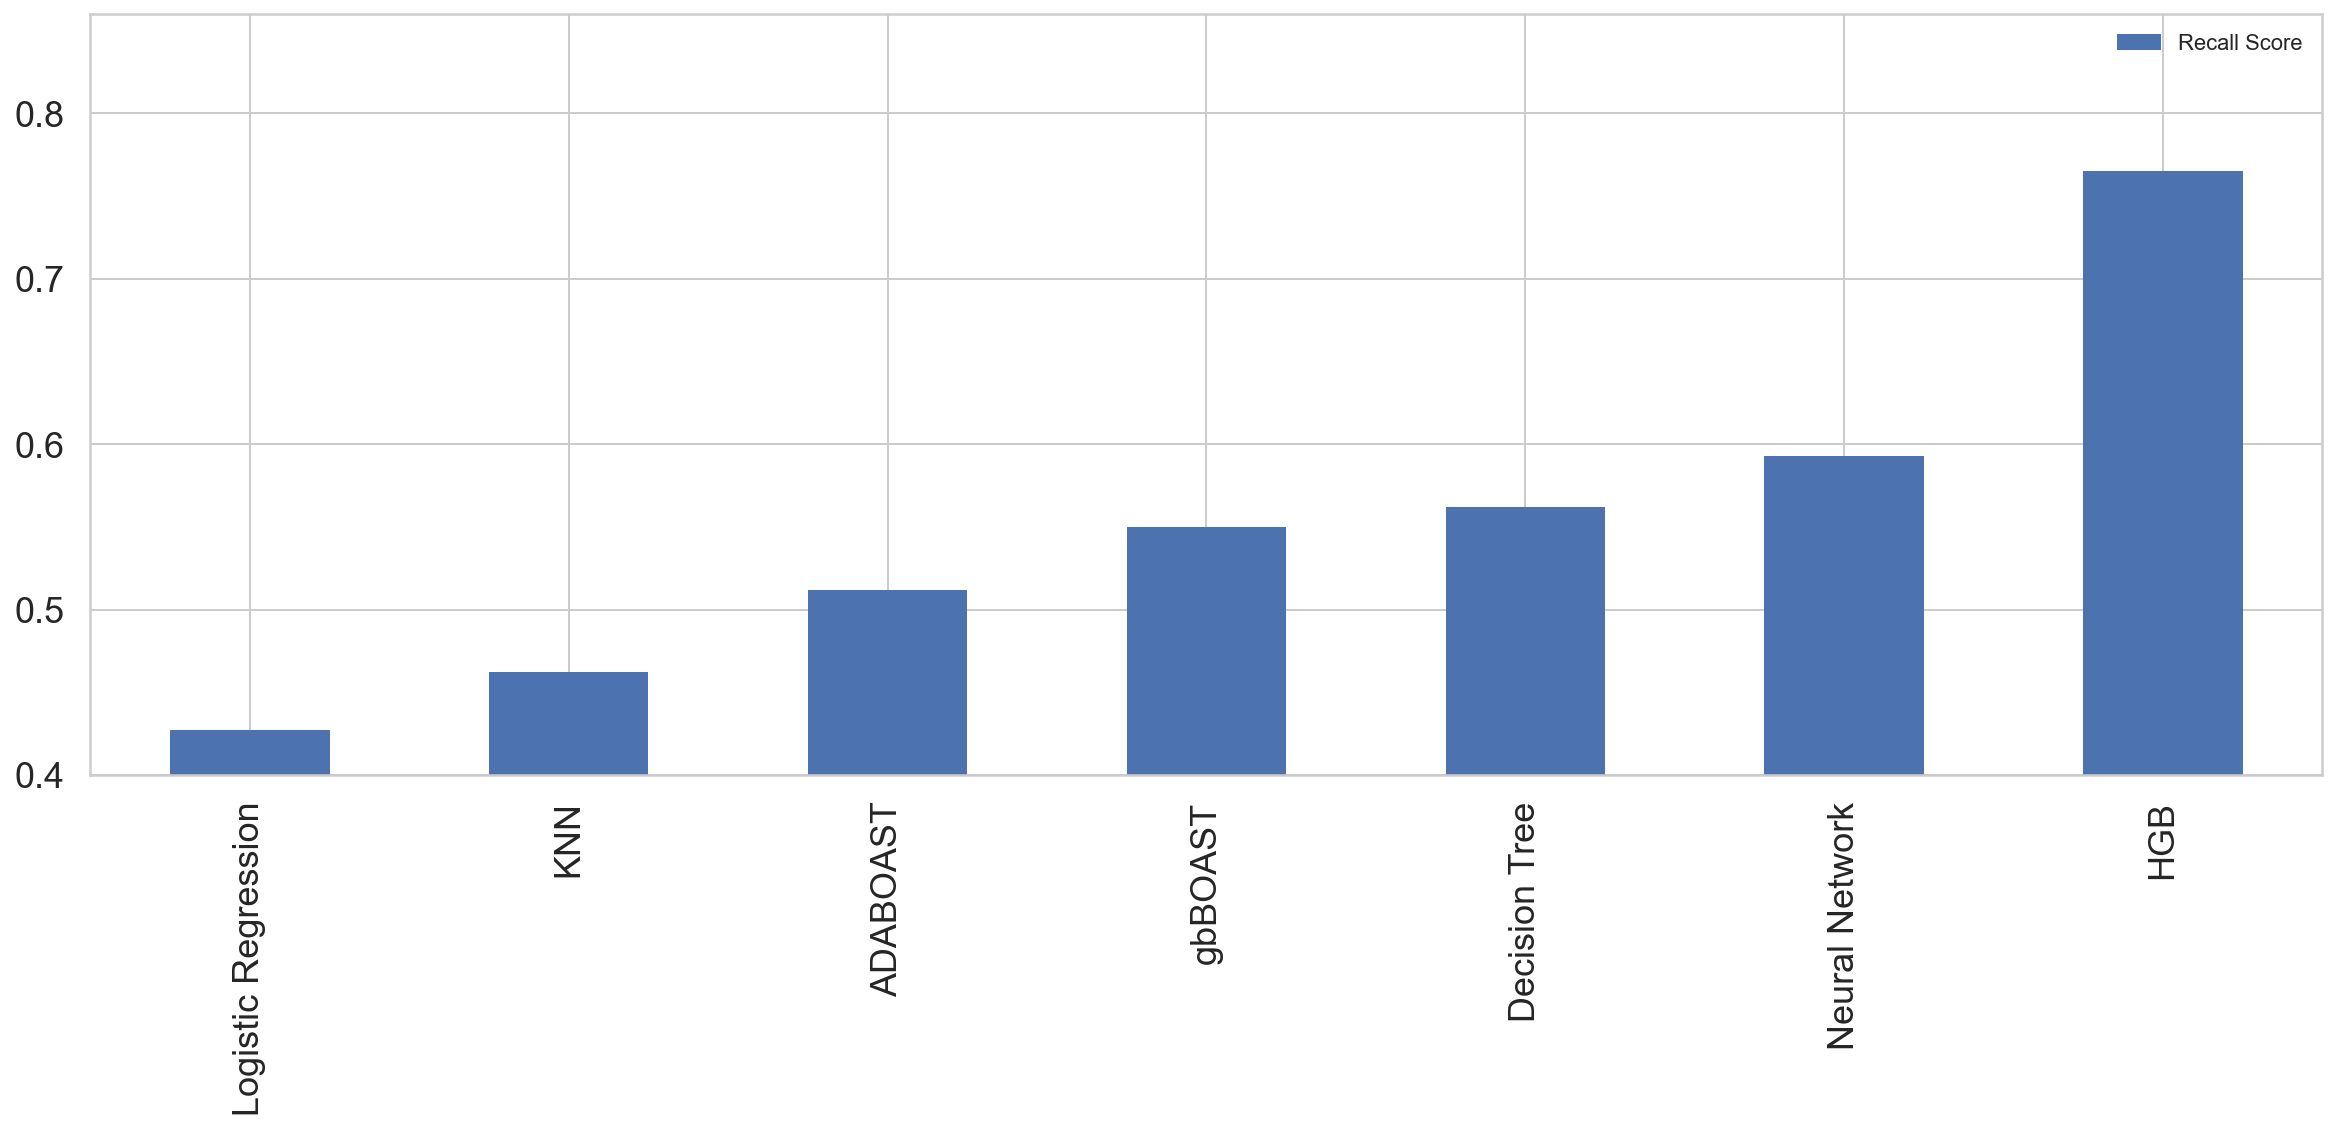

In [203]:
model_candidates = ['Decision Tree', #'NaiveBayes', 
                    'Neural Network', #'SupportVectorMachine',
                    'Logistic Regression', 'KNN', 'HGB','ADABOAST','gbBOAST']

model_candidates_results = [DT_benchmark, NN_benchmark, LR_benchmark, KNN_benchmark, HGB_recall, ADABOAST_benchmark,gbBOAST_benchmark ]#NB_benchmark, SVM_benchmark,

pd.DataFrame(model_candidates_results, 
             index=model_candidates, 
             columns=['Recall Score']).sort_values(by='Recall Score').plot(kind='bar', 
                                                                   figsize=(20, 7), 
                                                                   ylim=(0.4, 0.86), 
                                                                   fontsize=(18))

## Hyperparameter Tuning Deepdive for Best Model

In [237]:
# explicitly require this experimental feature
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_hist_gradient_boosting 
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_pipe = HistGradientBoostingClassifier()

#parameters to tune
parameters = {"learning_rate" : [0.1,0.3,0.05,0.5],
              "max_iter" : [90,100,125], 
              "max_leaf_nodes": [28,31,33],
              "min_samples_leaf": [15,20,25], 
    }
#instantiate the gridsearch
hgb_grid = GridSearchCV(hgb_pipe, parameters, n_jobs=-1,  
 cv=5, scoring="f1_micro",
 verbose=2, refit=True)

#fit on the grid 
hgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 24.8min finished


GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.05, 0.5],
                         'max_iter': [90, 100, 125],
                         'max_leaf_nodes': [28, 31, 33],
                         'min_samples_leaf': [15, 20, 25]},
             scoring='f1_micro', verbose=2)

In [239]:
hgb_grid.best_params_


{'learning_rate': 0.5,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20}

In [241]:
gb1 = GradientBoostingClassifier(learning_rate= 0.5, max_leaf_nodes= 31, min_samples_leaf= 20, random_state = 5).fit(X_train, y_train)

y_gb_train= gb1.predict(X_train)
y_gb_val = gb1.predict(X_test)

recall_score(y_test, y_gb_val, average='binary')

0.6004993757802747

## Predicting No-Shows

# Deployment

## Pipeline for predicting when you get a new booking (model)

## User Interface (Application)